# Data Pre-processing

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
from sklearn import preprocessing as ps
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold , StratifiedKFold
from sklearn.preprocessing import StandardScaler as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [171]:
from sklearn import tree     
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [172]:
pcos_dt = pd.read_csv('PCOS_data.csv')
pcos_dt.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [173]:
pcos_dt.shape

(541, 45)

In [174]:
pcos_dt.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [175]:
#To remove whitespaces at both ends from a column name

pcos_dt.columns = pcos_dt.columns.str.strip()

In [176]:
pcos_dt.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

## Removing unwanted columns


In [177]:
pcos_dt.drop(['Sl. No', 'Patient File No.','Unnamed: 44'],axis='columns',inplace=True)

### Imputing Missing values

Rows with unmatching values are removed and some values are replaced

In [178]:
pcos_dt = pcos_dt.replace(pcos_dt['II    beta-HCG(mIU/mL)'][123],'1.99')
pcos_dt.drop(labels=305,axis=0,inplace=True)

Searching for columns with missing values

In [179]:
pcos_dt.isnull().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [180]:
# Replacing the missing values in a feature column with the median of the feature

pcos_dt['Marraige Status (Yrs)'].fillna(pcos_dt['Marraige Status (Yrs)'].median(), inplace = True)
pcos_dt['Fast food (Y/N)'].fillna(pcos_dt['Fast food (Y/N)'].median(), inplace = True)

In [181]:
pcos_dt.isnull().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

###*Standardization*

In [182]:
scaler = ps.StandardScaler()
pcos_sc = scaler.fit_transform(pcos_dt)
pcos_standardized_dt = pd.DataFrame(pcos_sc,columns = pcos_dt.columns)

In [183]:
pcos_standardized_dt.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,-0.698286,-0.632736,-1.364256,-0.745075,-1.234925,0.649989,1.07303,1.633230,-0.783571,-0.622331,...,-0.978019,0.967204,-0.571648,-0.630249,0.549622,-0.741039,-0.821501,0.837271,0.768152,0.008677
1,-0.698286,0.847188,0.485719,0.830263,0.146043,0.649989,0.17013,0.448617,0.624242,-0.622331,...,-0.978019,-1.033908,-0.571648,0.724586,-1.246962,-0.741039,-0.370677,-0.004051,-0.437116,-2.211658
2,1.432078,0.292216,0.830323,1.410651,0.244683,-1.523349,-0.28132,-0.735996,0.739636,-0.622331,...,1.022475,0.967204,-0.571648,0.724586,0.549622,1.623978,1.883440,0.837271,1.370786,0.702532
3,-0.698286,1.032178,0.485719,-1.408376,1.329730,-0.436680,-0.28132,0.448617,0.970425,-0.622331,...,-0.978019,-1.033908,-0.571648,0.724586,-1.246962,-0.977540,-1.046912,-0.004051,-0.437116,-0.453892
4,-0.698286,-1.187707,-0.693187,0.747350,-1.037644,-1.523349,-0.28132,-0.735996,-1.337465,-0.622331,...,-0.978019,-1.033908,-0.571648,0.724586,0.549622,-0.741039,-0.596089,0.276390,-0.437116,-0.685177


### *Normalization*

In [184]:
scaler = ps.MinMaxScaler()
pcos_sc = scaler.fit_transform(pcos_dt)
pcos_normalized_dt = pd.DataFrame(pcos_sc,columns = pcos_dt.columns)

In [185]:
pcos_normalized_dt.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,0.285714,0.176623,0.348837,0.260377,0.571429,0.942029,0.500000,0.314286,0.0,...,0.0,1.0,0.0,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.472222
1,0.0,0.571429,0.441558,0.569767,0.471698,0.571429,0.884058,0.333333,0.507937,0.0,...,0.0,0.0,0.0,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.205556
2,1.0,0.464286,0.490909,0.651163,0.486792,0.000000,0.855072,0.166667,0.523810,0.0,...,1.0,1.0,0.0,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.555556
3,0.0,0.607143,0.441558,0.255814,0.652830,0.285714,0.855072,0.333333,0.555556,0.0,...,0.0,0.0,0.0,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.416667
4,0.0,0.178571,0.272727,0.558140,0.290566,0.000000,0.855072,0.166667,0.238095,0.0,...,0.0,0.0,0.0,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.388889


## **Data Summarization**

In [186]:
pcos_dt.shape

(540, 42)

In [187]:
pcos_dt.dtypes

PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [188]:
pcos_dt.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.327778,31.420370,59.643889,156.493141,24.307778,13.803704,73.246296,19.242593,11.159037,2.561111,...,0.488889,0.516667,0.246296,114.651852,76.940741,6.133333,6.644444,15.014444,15.450685,8.481241
std,0.469839,5.410698,11.037399,6.036043,4.058886,1.842194,4.434274,1.689881,0.867396,0.902463,...,0.500340,0.500185,0.431253,7.387819,5.571279,4.232220,4.440439,3.569123,3.321841,2.163840
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.750000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.300000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.625000,15.000000,74.000000,20.000000,11.725000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [189]:
pcos_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              540 non-null    int64  
 1   Age (yrs)               540 non-null    int64  
 2   Weight (Kg)             540 non-null    float64
 3   Height(Cm)              540 non-null    float64
 4   BMI                     540 non-null    float64
 5   Blood Group             540 non-null    int64  
 6   Pulse rate(bpm)         540 non-null    int64  
 7   RR (breaths/min)        540 non-null    int64  
 8   Hb(g/dl)                540 non-null    float64
 9   Cycle(R/I)              540 non-null    int64  
 10  Cycle length(days)      540 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           540 non-null    int64  
 13  No. of abortions        540 non-null    int64  
 14  I   beta-HCG(mIU/mL)    540 non-null    float64

In [190]:
pcos_dt.to_csv("pcos_datatset_cleaned.csv")

#Data Visualization

PCOS (Y/N)
PCOS (Y/N)
0    363
1    177
Name: count, dtype: int64


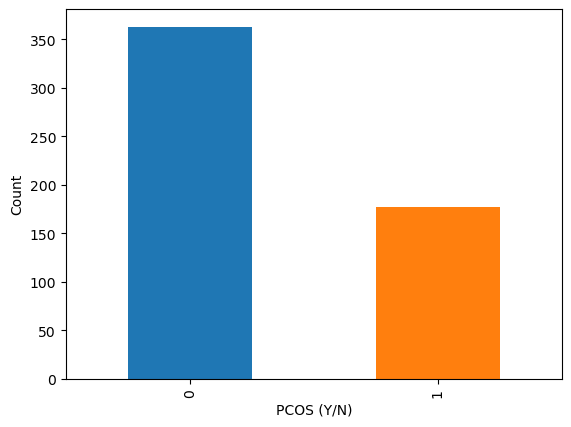

Blood Group
Blood Group
15    206
13    134
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


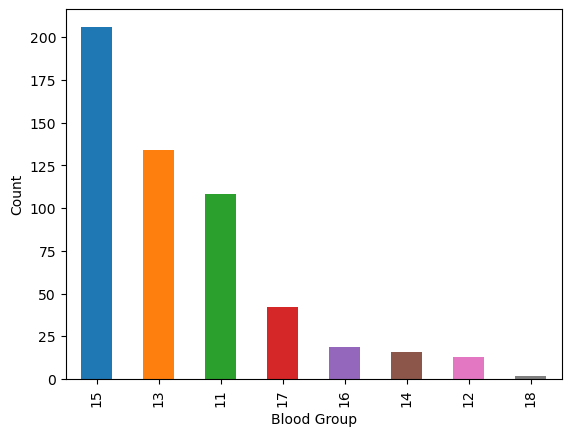

Pregnant(Y/N)
Pregnant(Y/N)
0    334
1    206
Name: count, dtype: int64


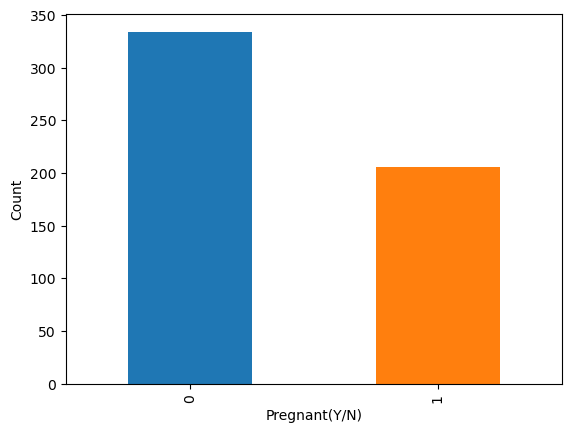

Weight gain(Y/N)
Weight gain(Y/N)
0    336
1    204
Name: count, dtype: int64


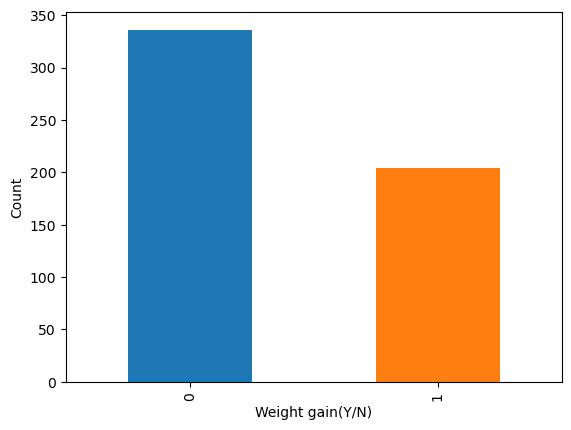

hair growth(Y/N)
hair growth(Y/N)
0    392
1    148
Name: count, dtype: int64


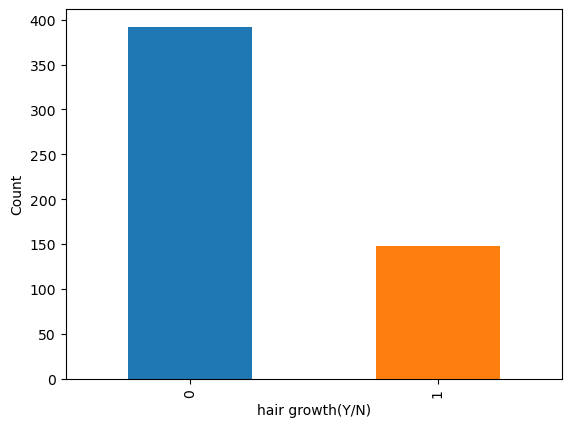

Skin darkening (Y/N)
Skin darkening (Y/N)
0    374
1    166
Name: count, dtype: int64


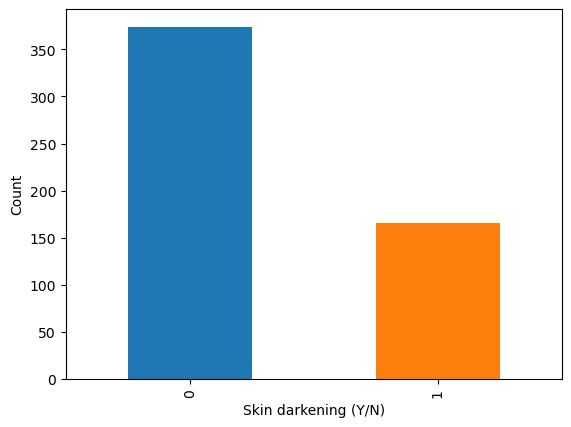

Hair loss(Y/N)
Hair loss(Y/N)
0    295
1    245
Name: count, dtype: int64


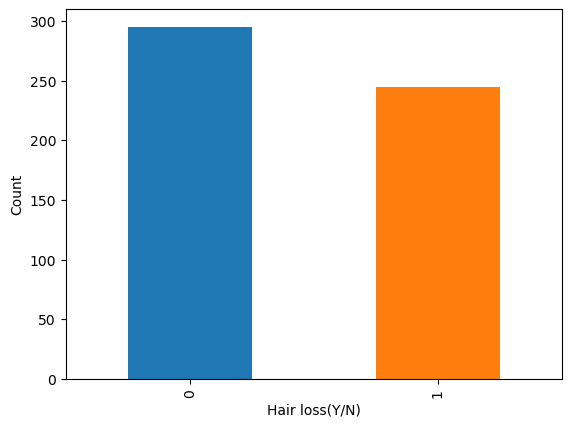

Pimples(Y/N)
Pimples(Y/N)
0    276
1    264
Name: count, dtype: int64


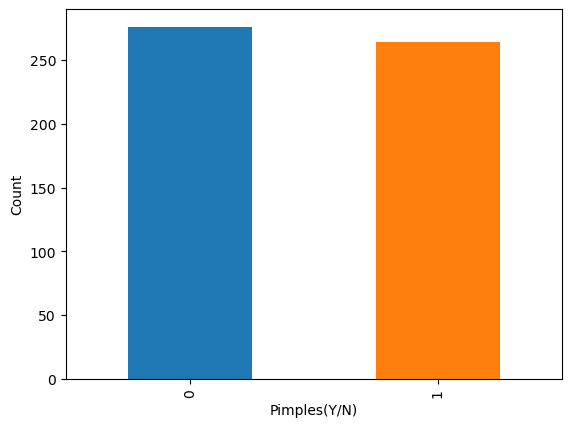

Fast food (Y/N)
Fast food (Y/N)
1.0    279
0.0    261
Name: count, dtype: int64


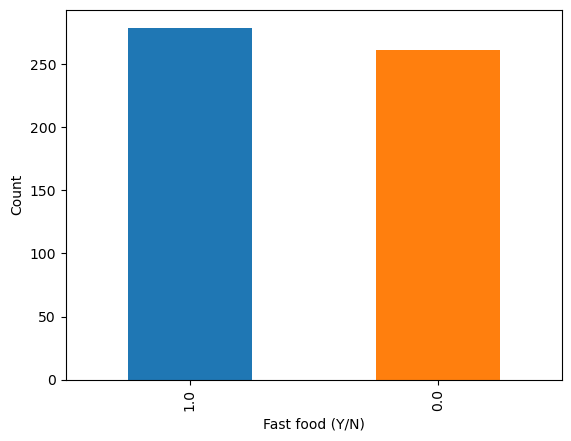

Reg.Exercise(Y/N)
Reg.Exercise(Y/N)
0    407
1    133
Name: count, dtype: int64


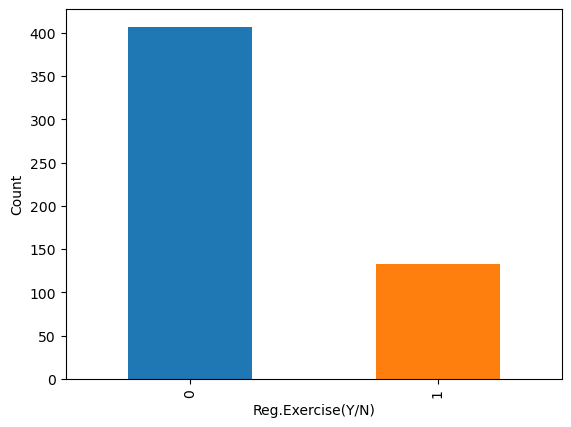

In [191]:
# Plotting all the categorical variables using bar plot
cv = ['PCOS (Y/N)','Blood Group','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

for i in cv:
  plt.xlabel(i)
  plt.ylabel('Count')
  c=pcos_dt[i].value_counts()
  print(i)
  print(c)
  colors = [('C'+str(j)) for j in range(len(c))]
  pcos_dt[i].value_counts().plot(kind='bar',color=colors)
  plt.show()

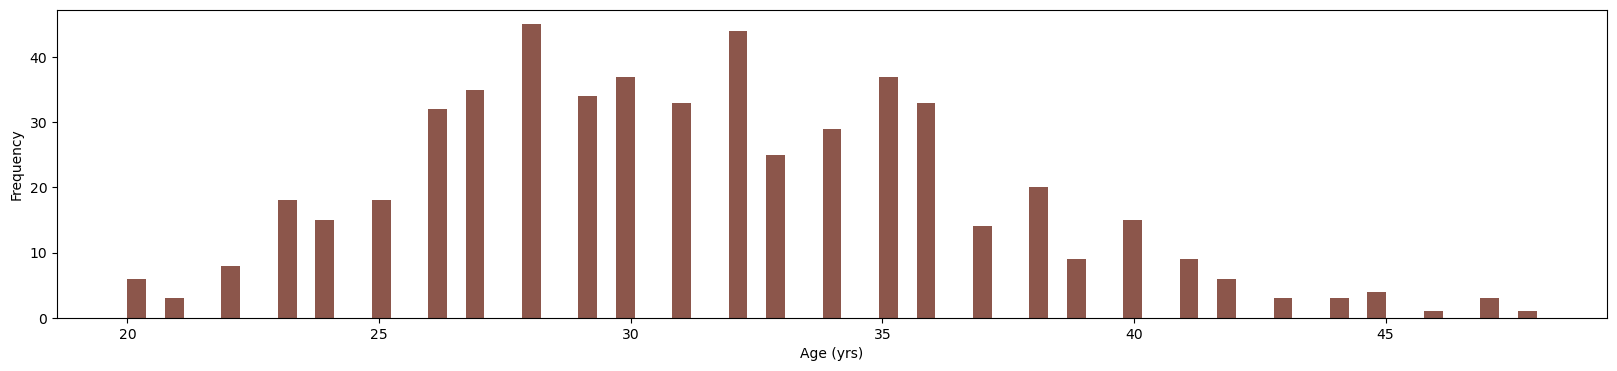

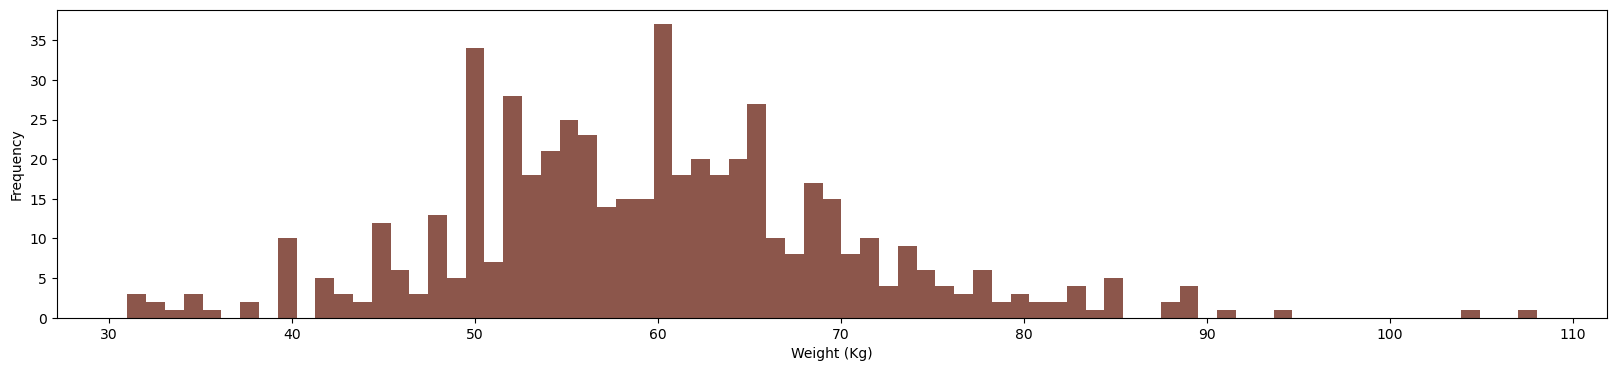

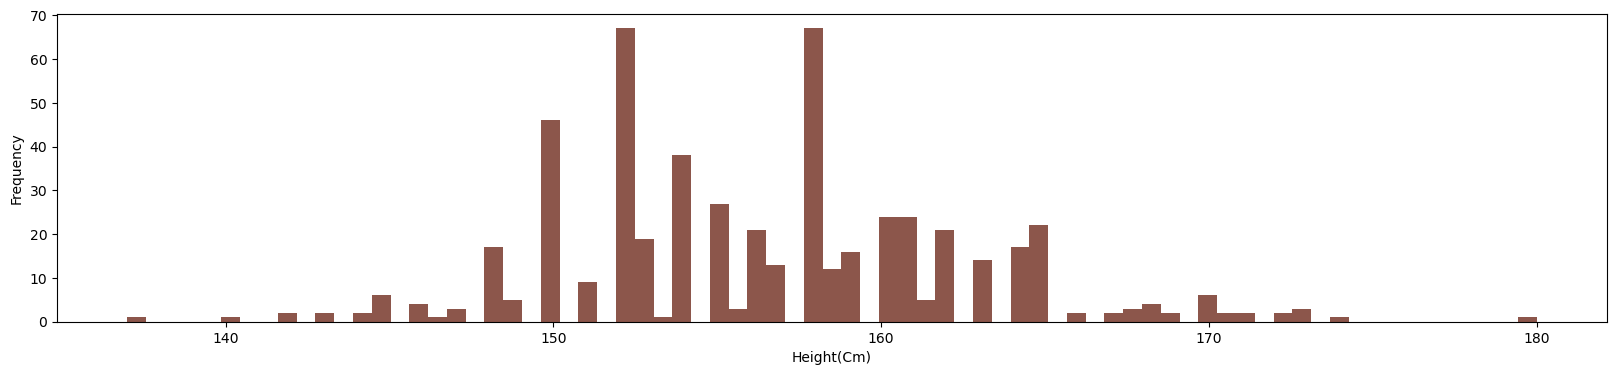

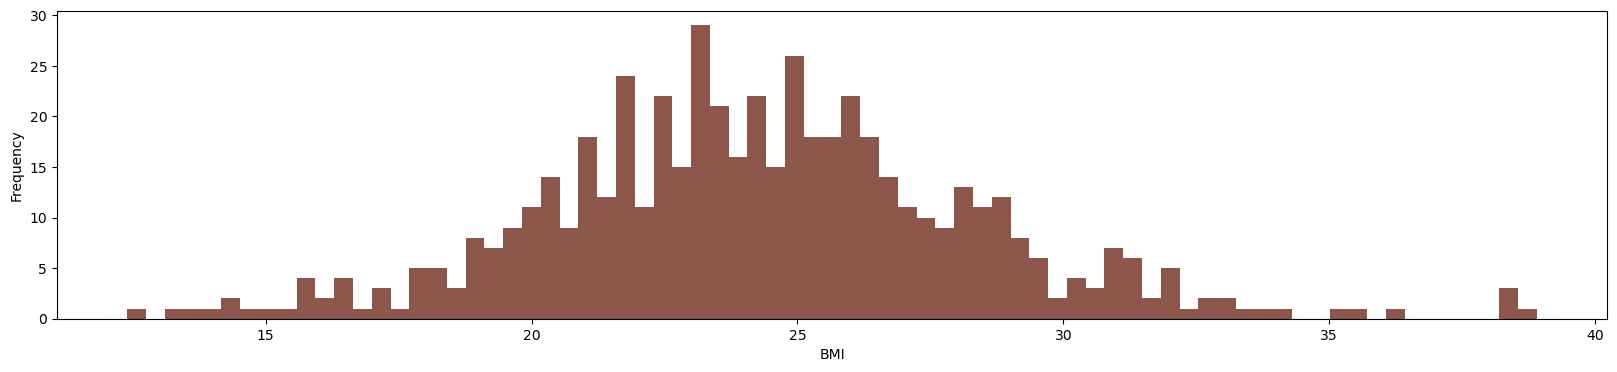

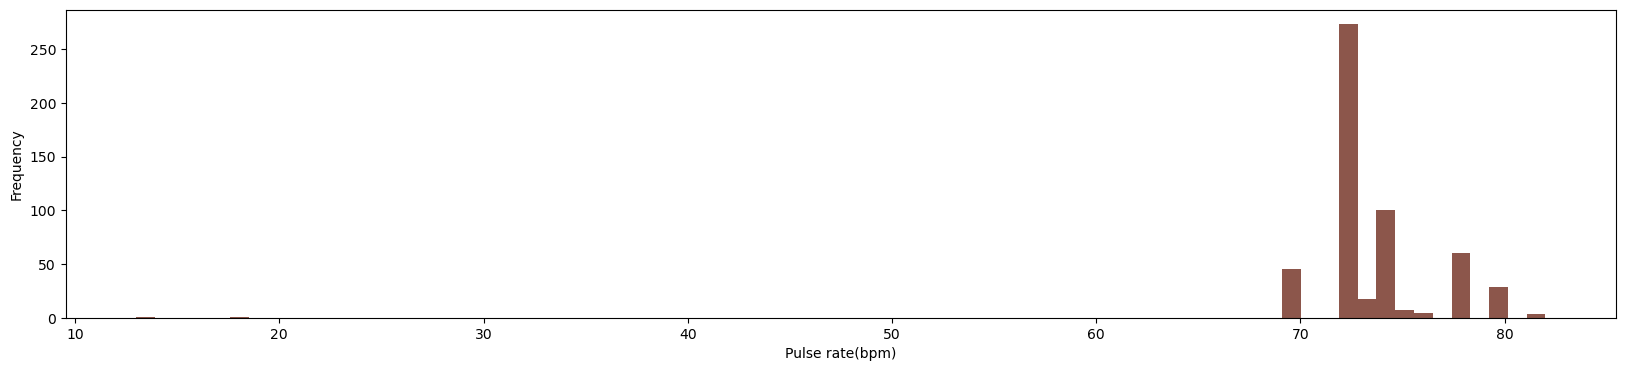

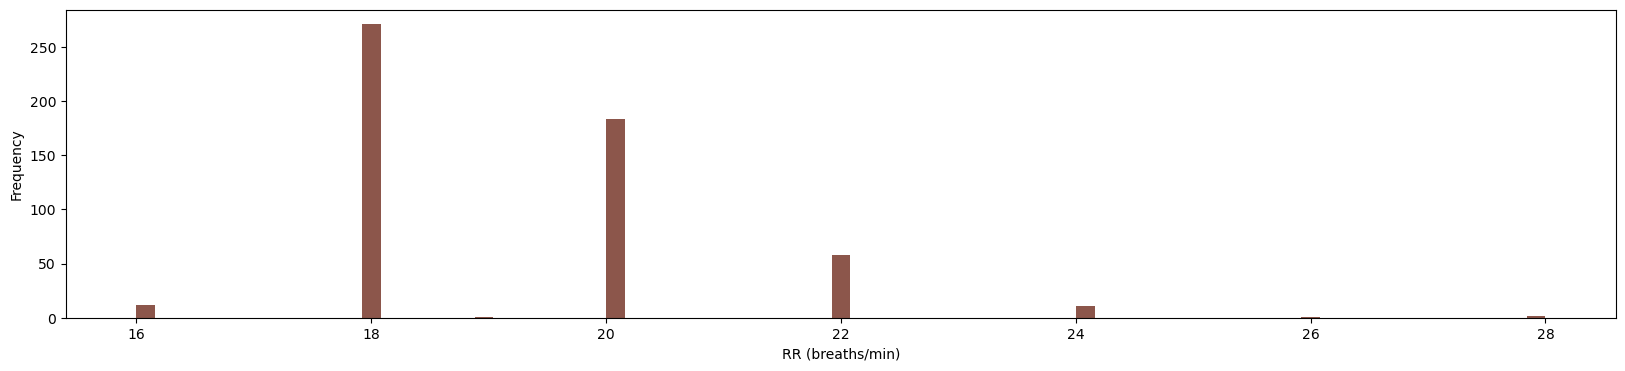

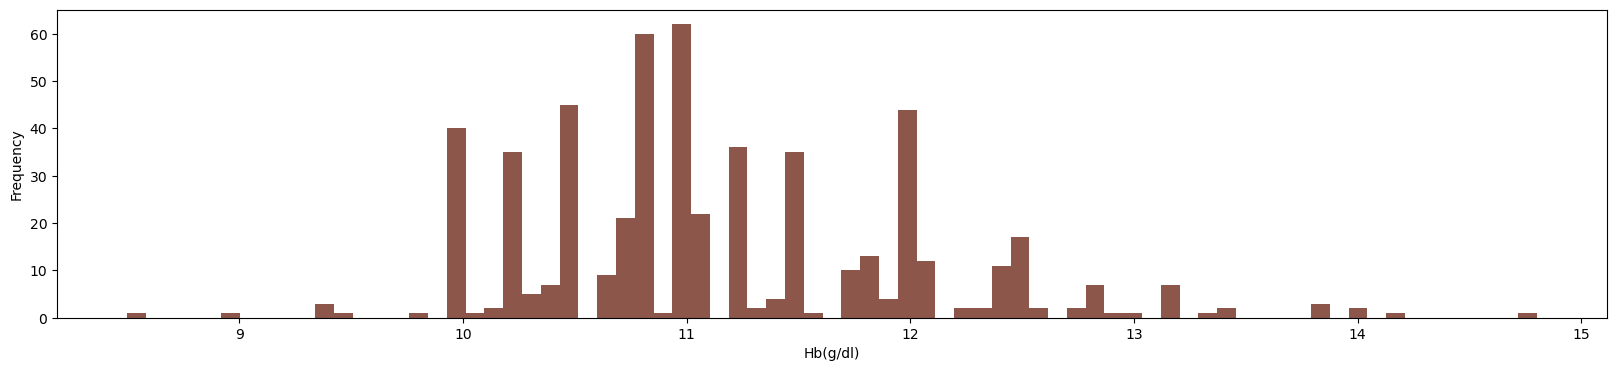

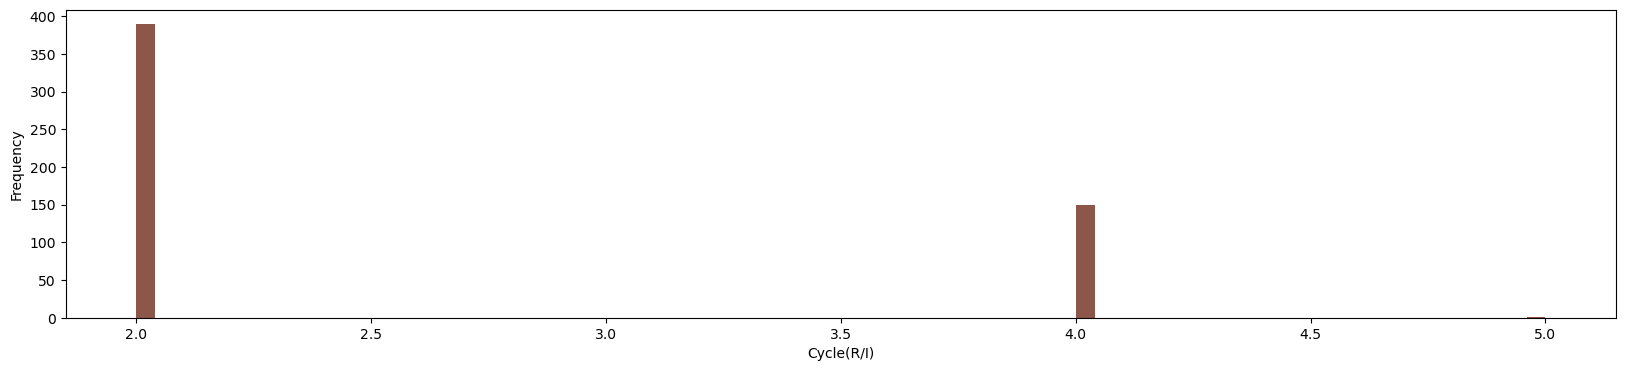

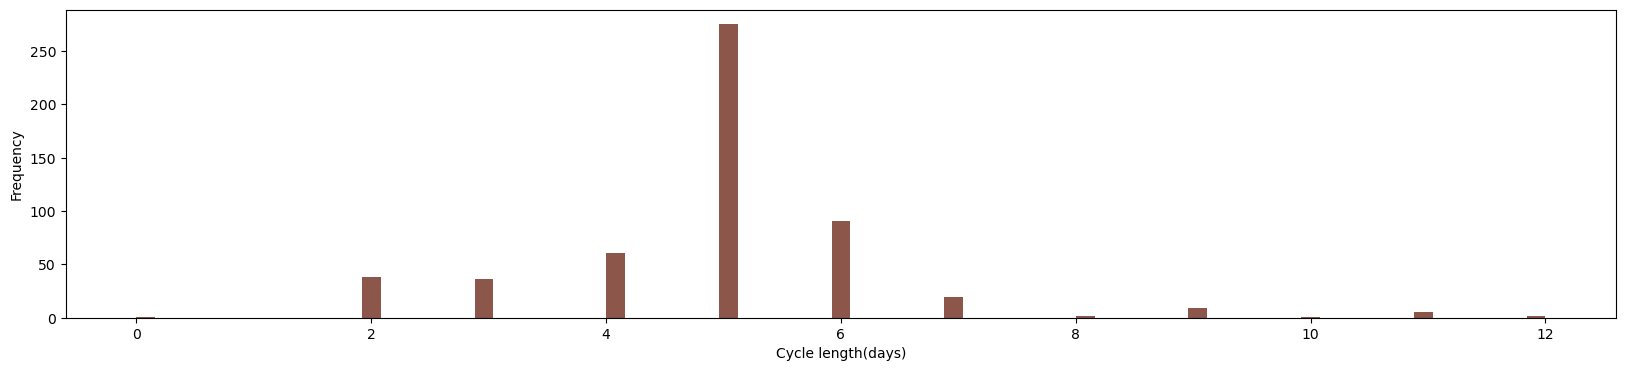

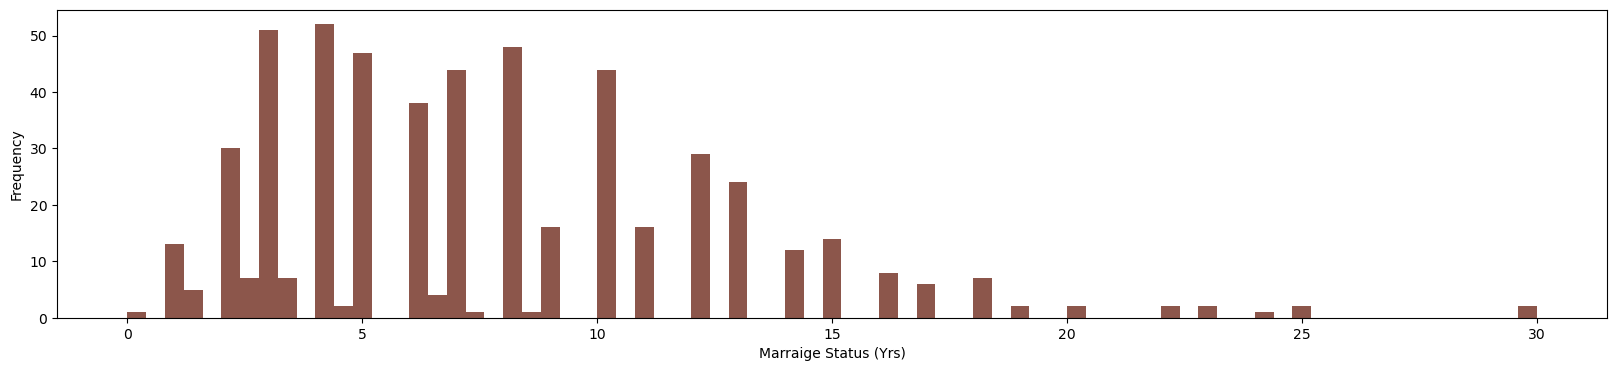

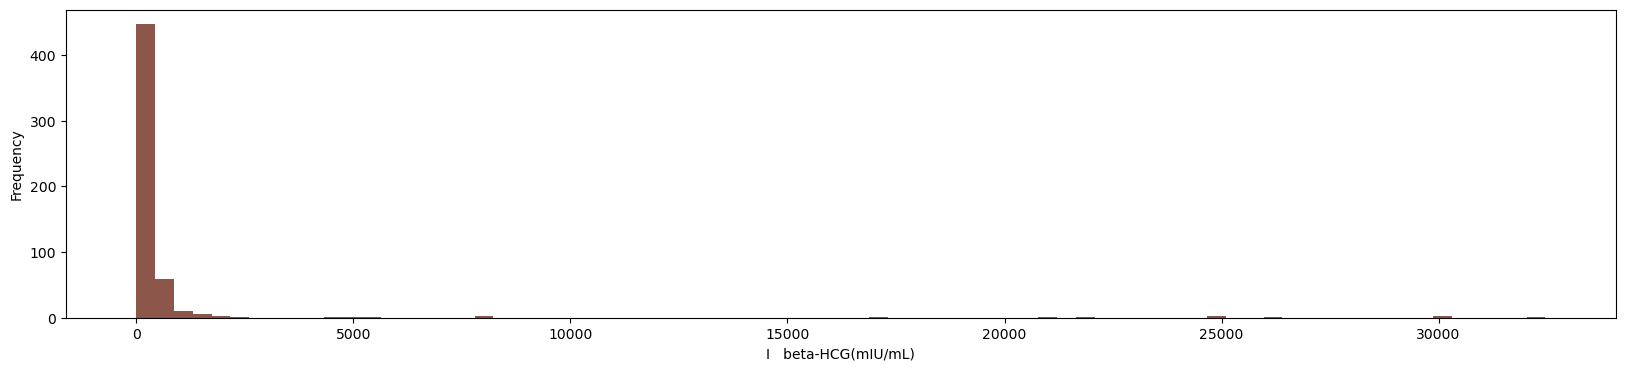

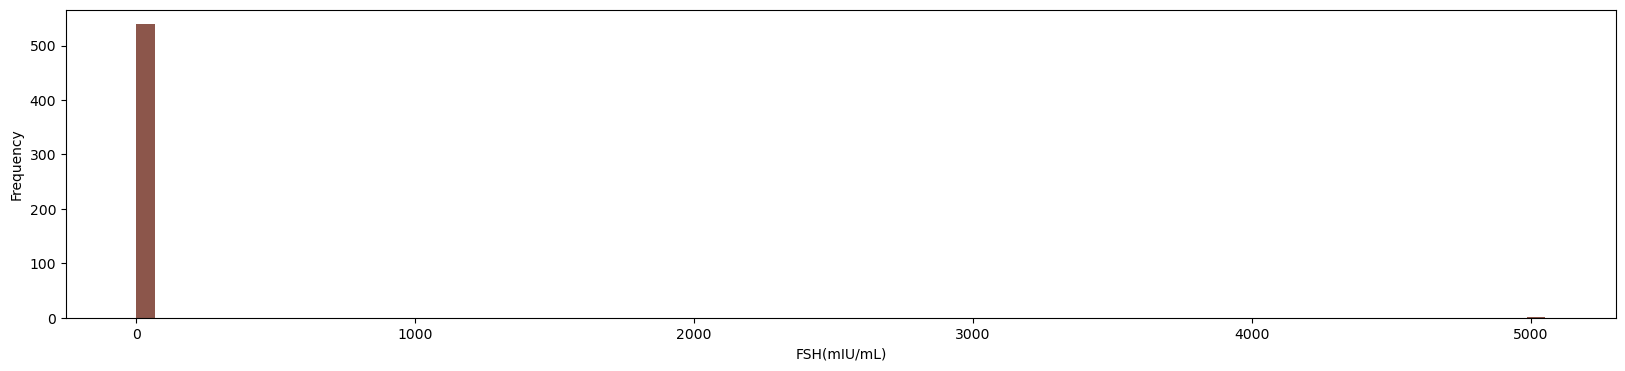

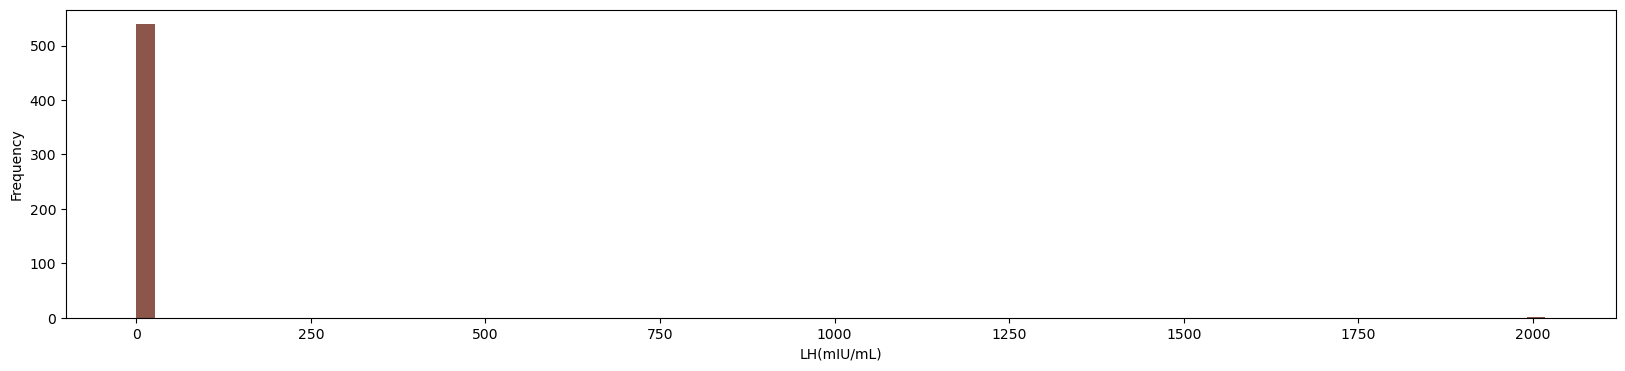

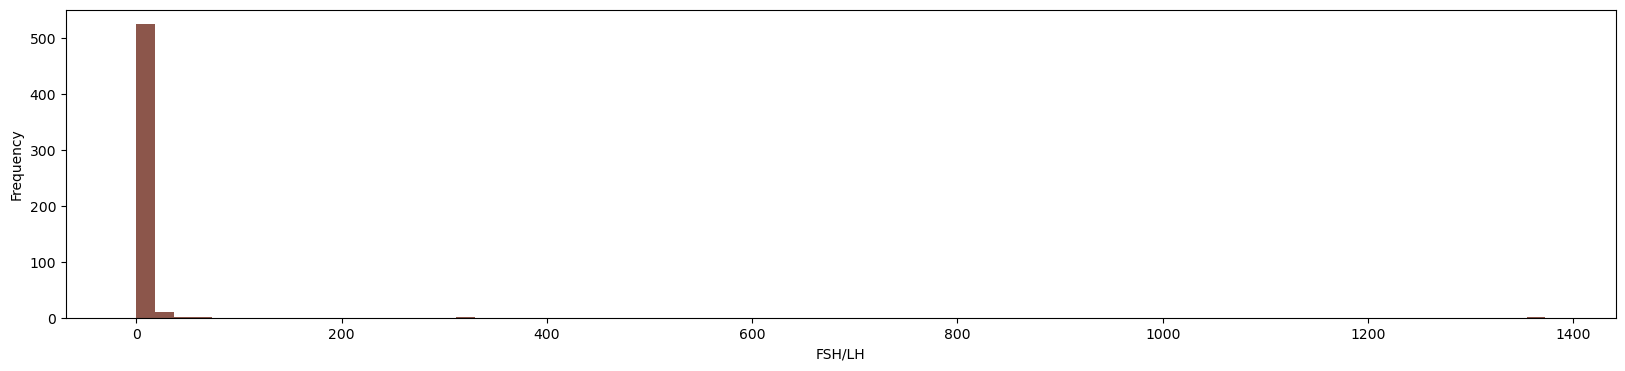

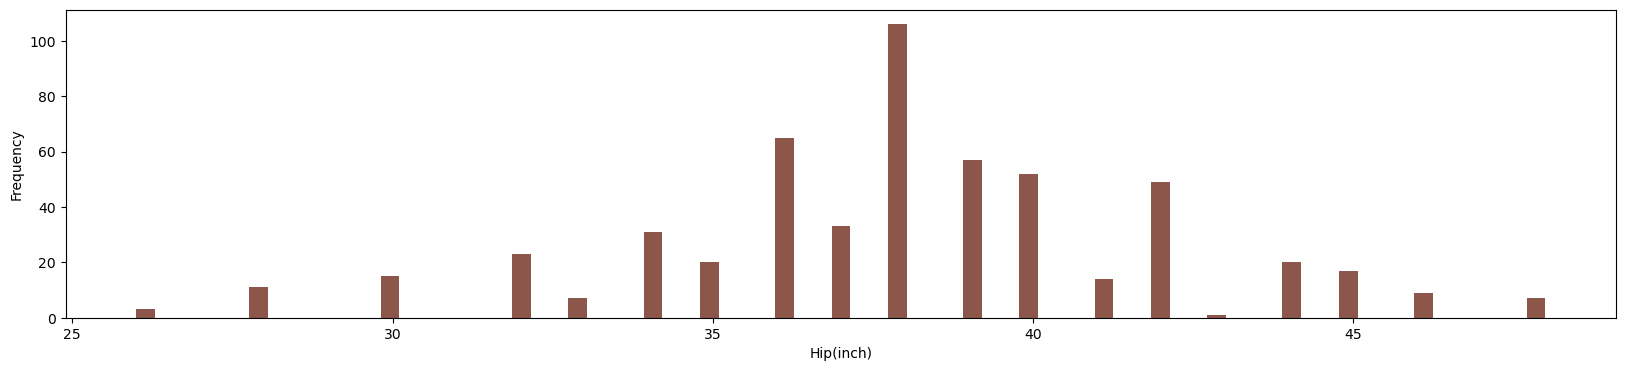

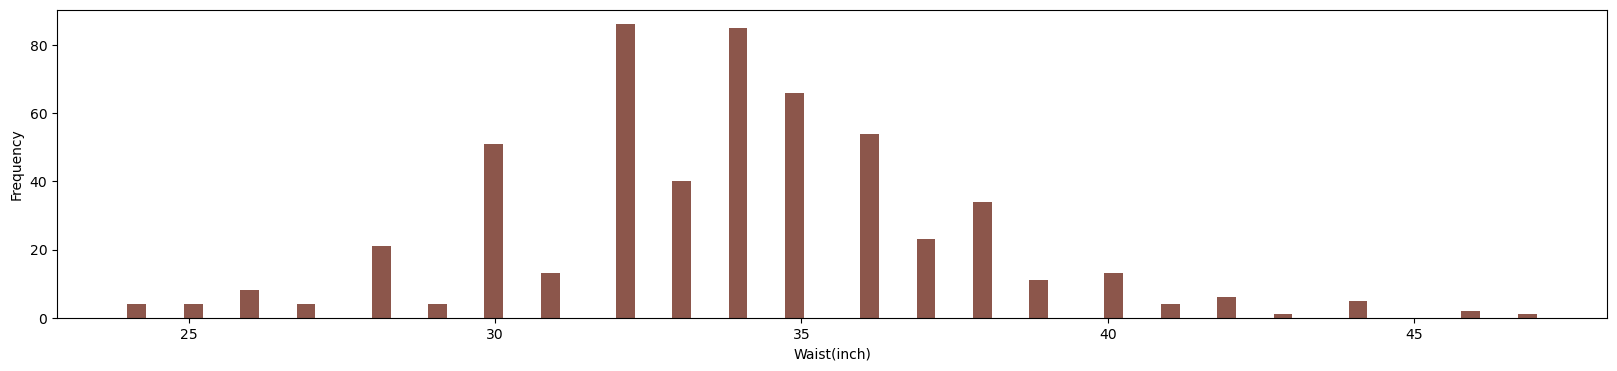

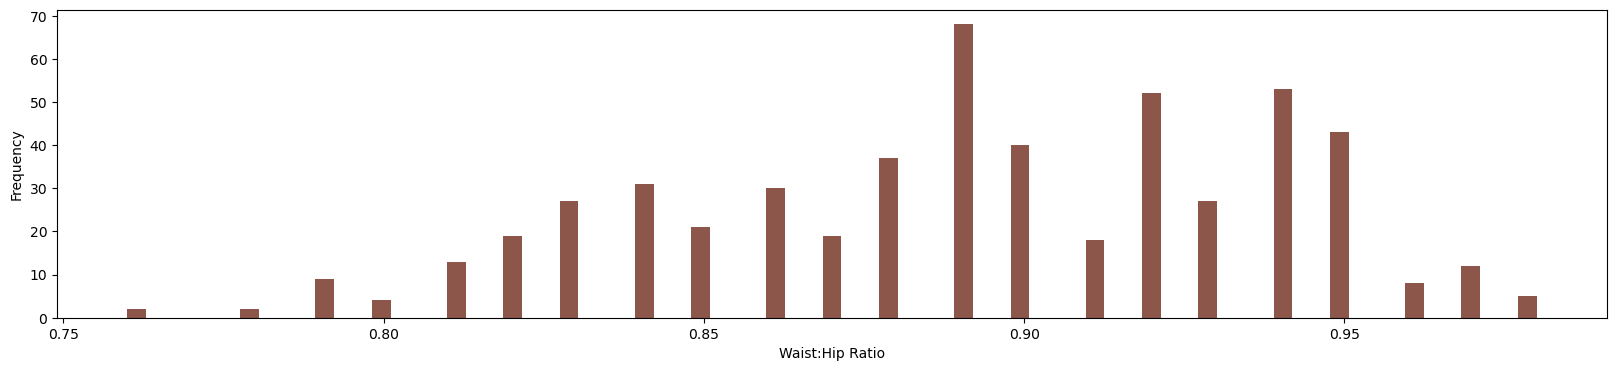

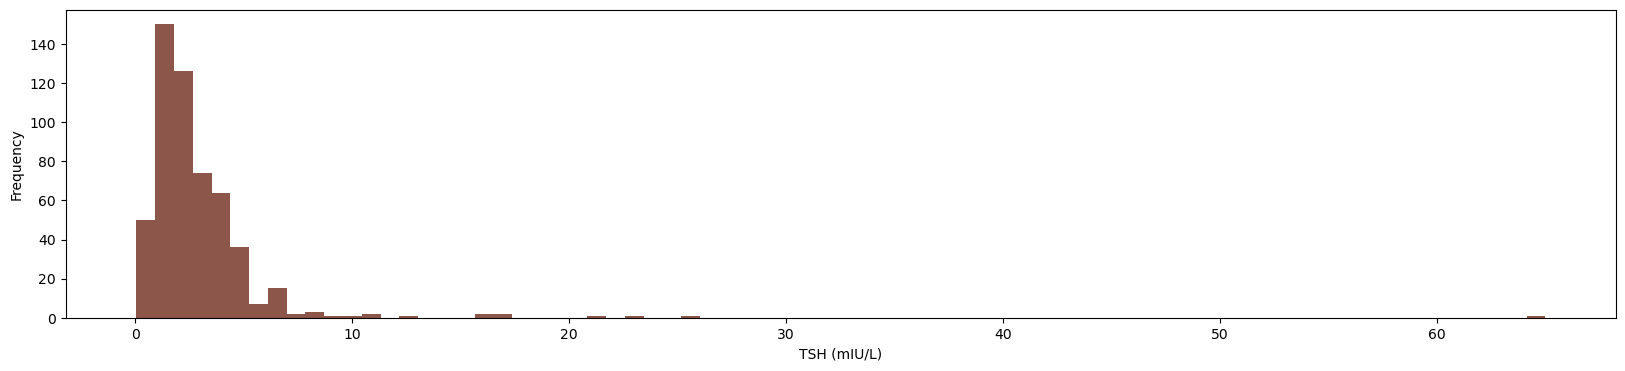

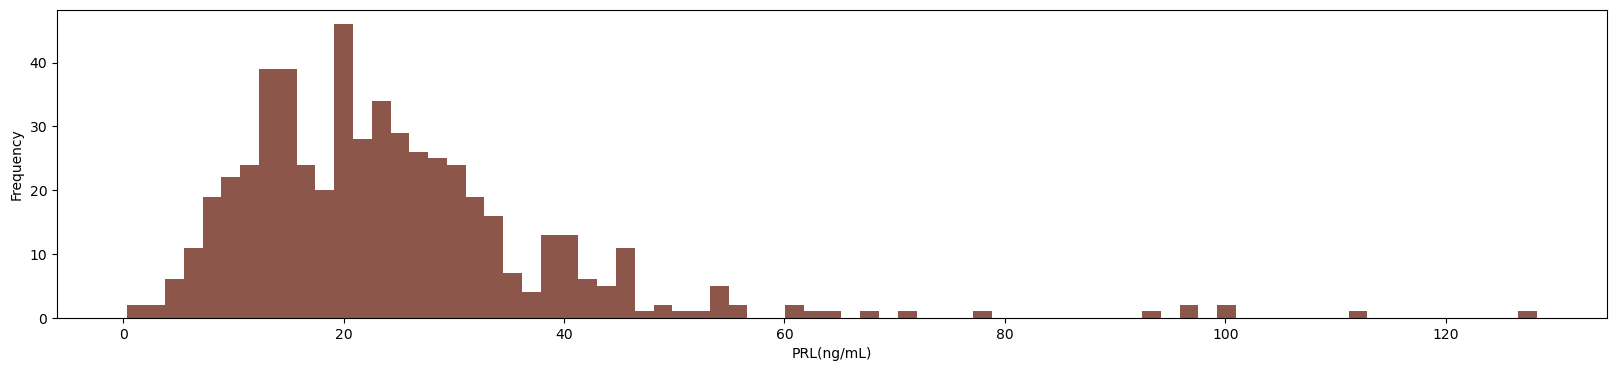

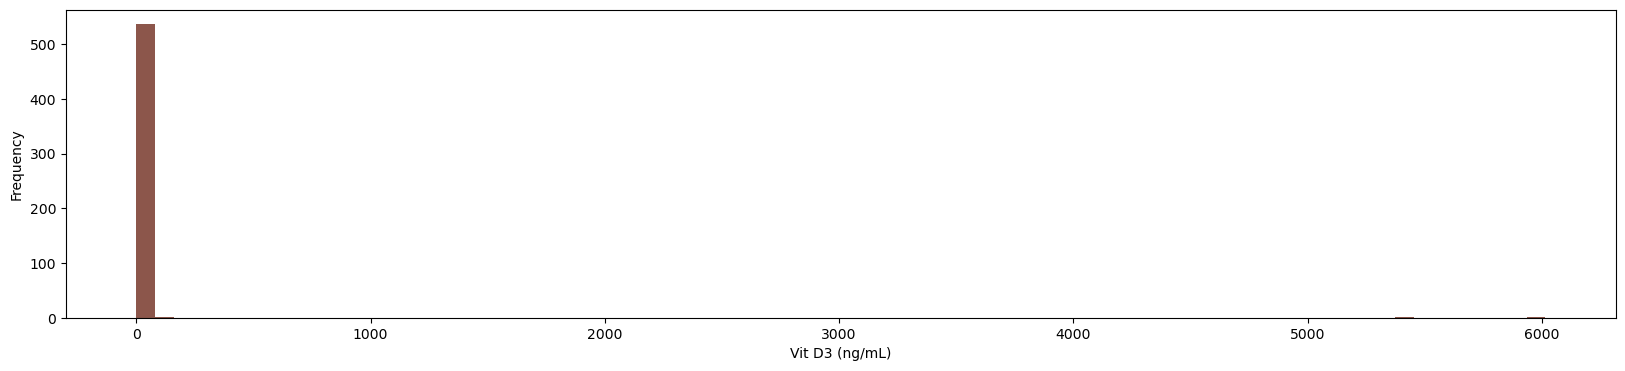

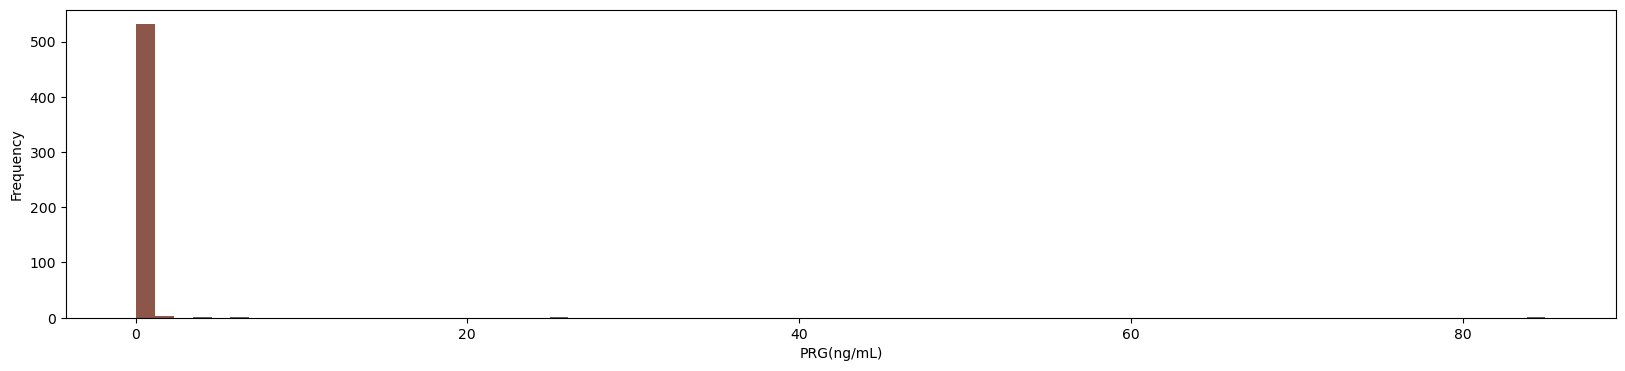

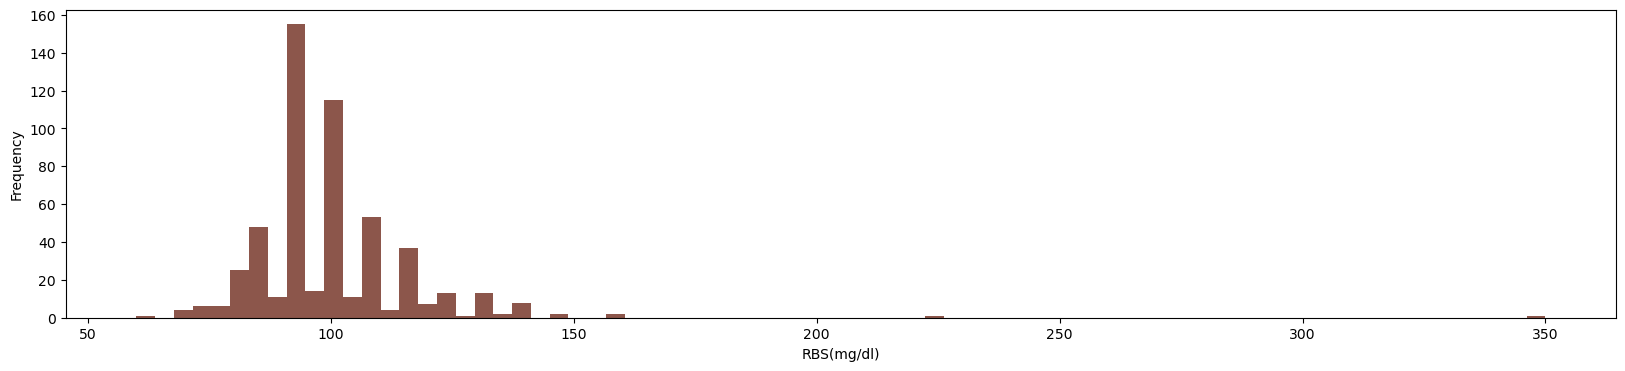

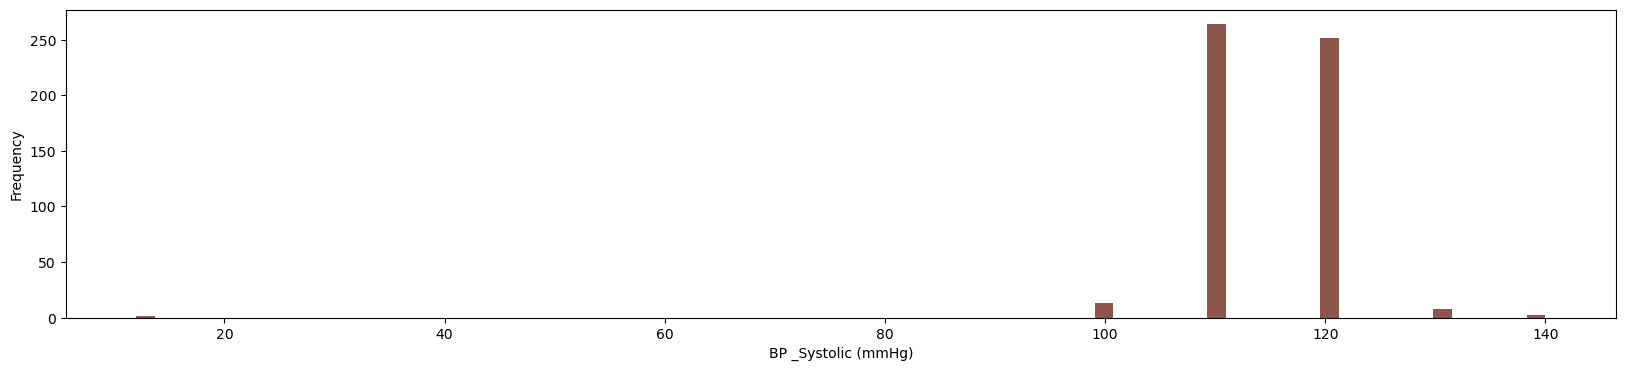

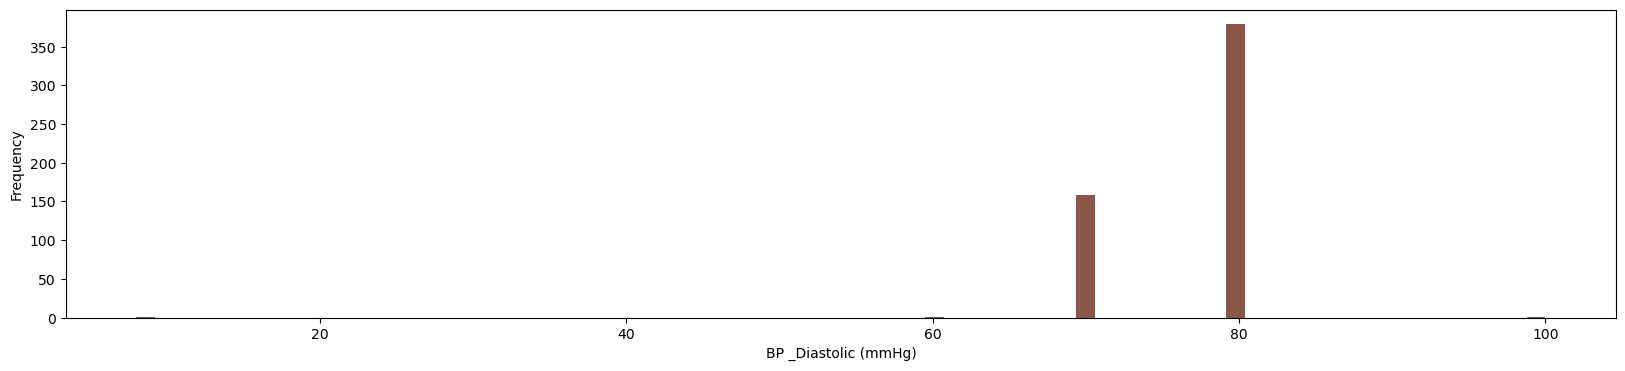

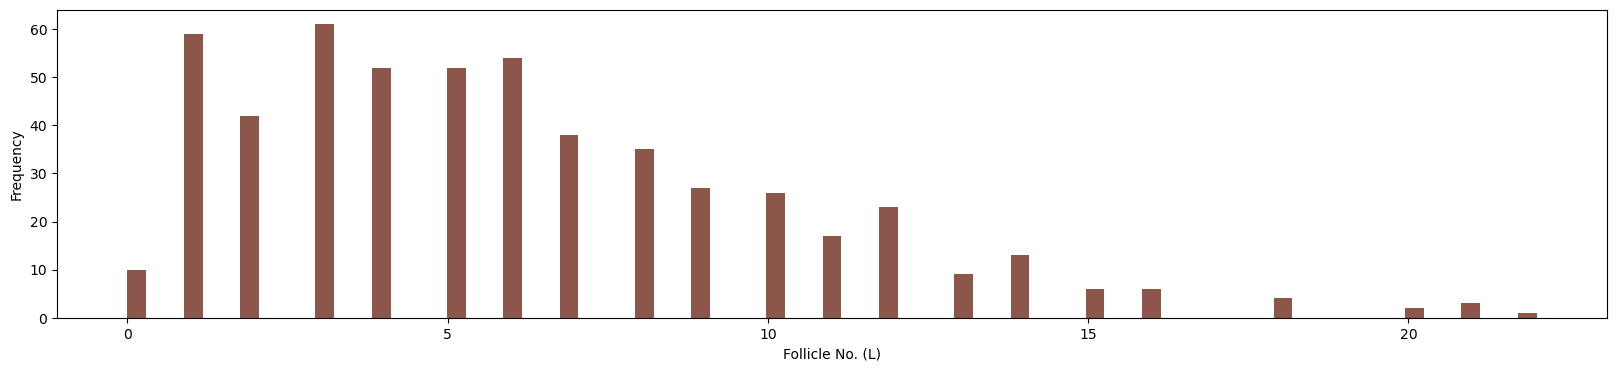

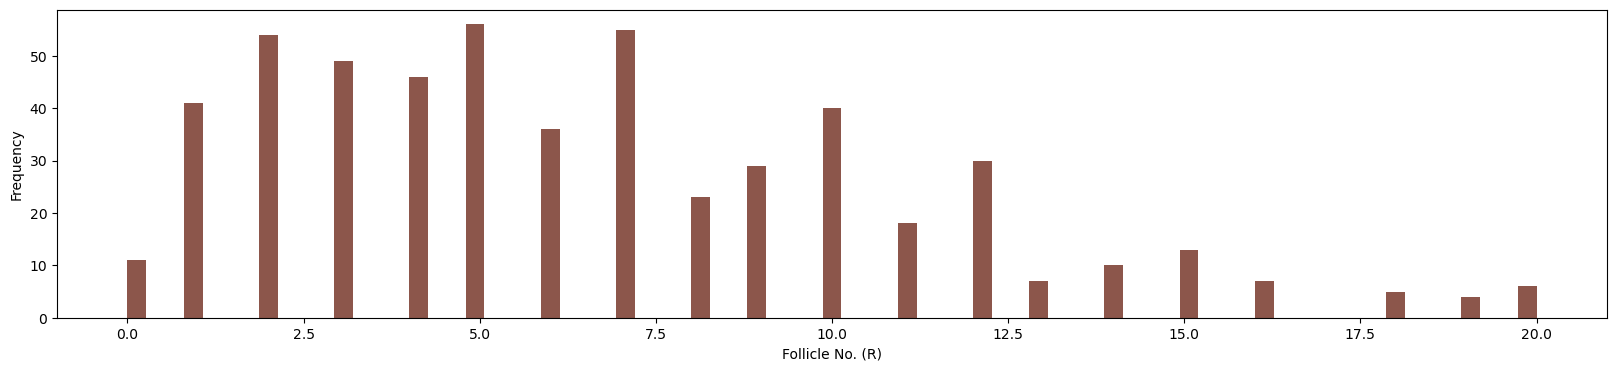

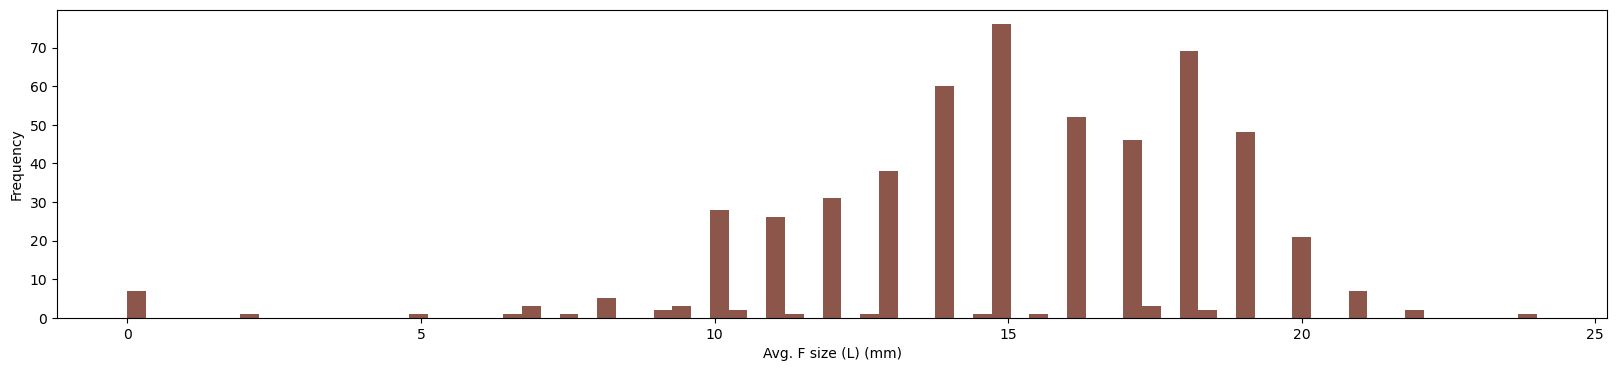

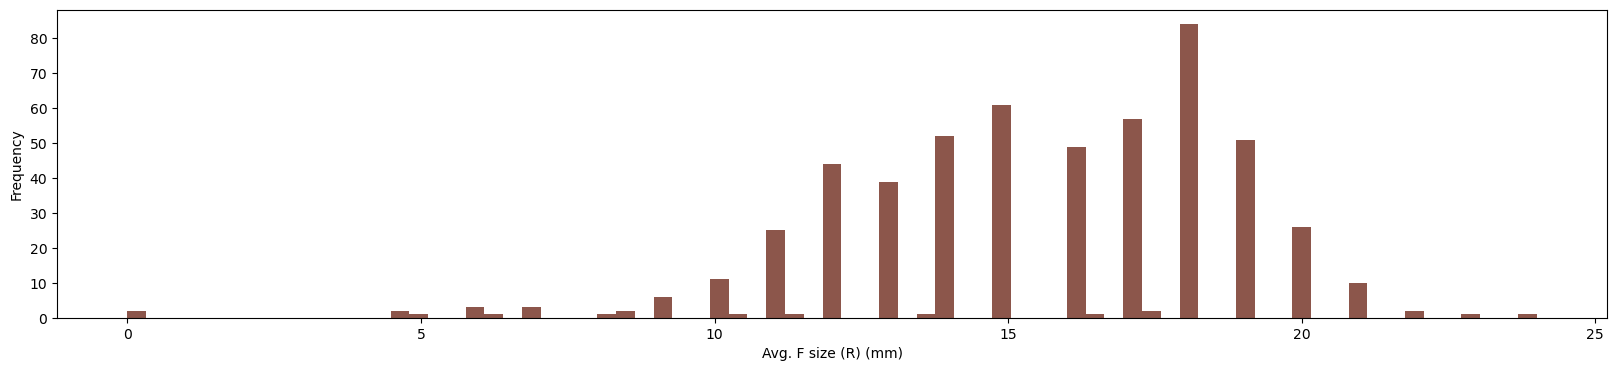

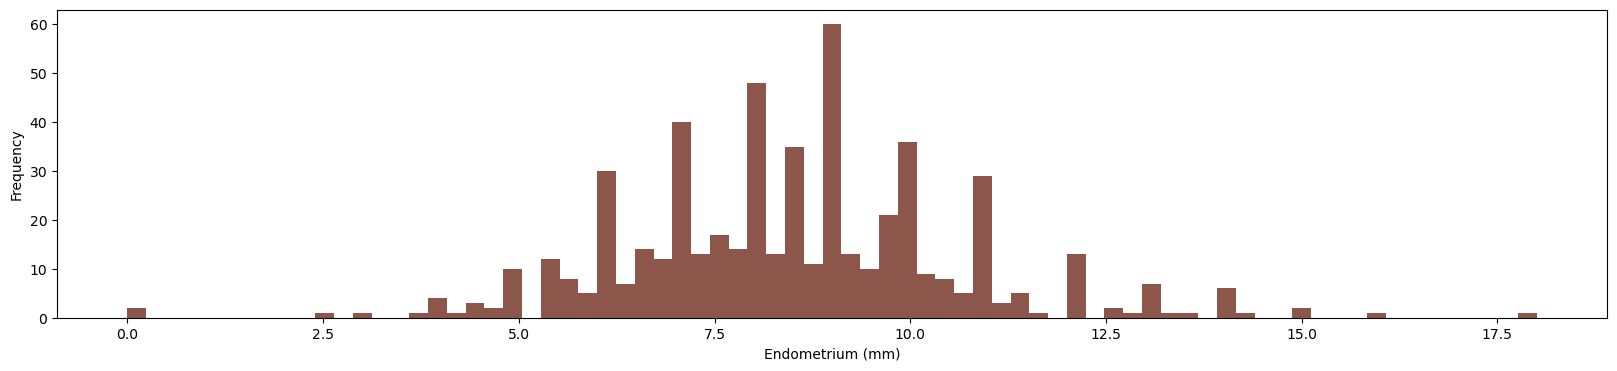

In [192]:
# Plotting all the numerical variables using bar plot
nv = ['Age (yrs)', 'Weight (Kg)','Height(Cm)', 'BMI','Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)','I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)','BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
for i in nv:
  plt.figure(figsize=(20,4))
  plt.hist(pcos_dt[i], bins = 75,color='C5')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()


# Feature Selection

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Using correlation with heatmap to identify the important features

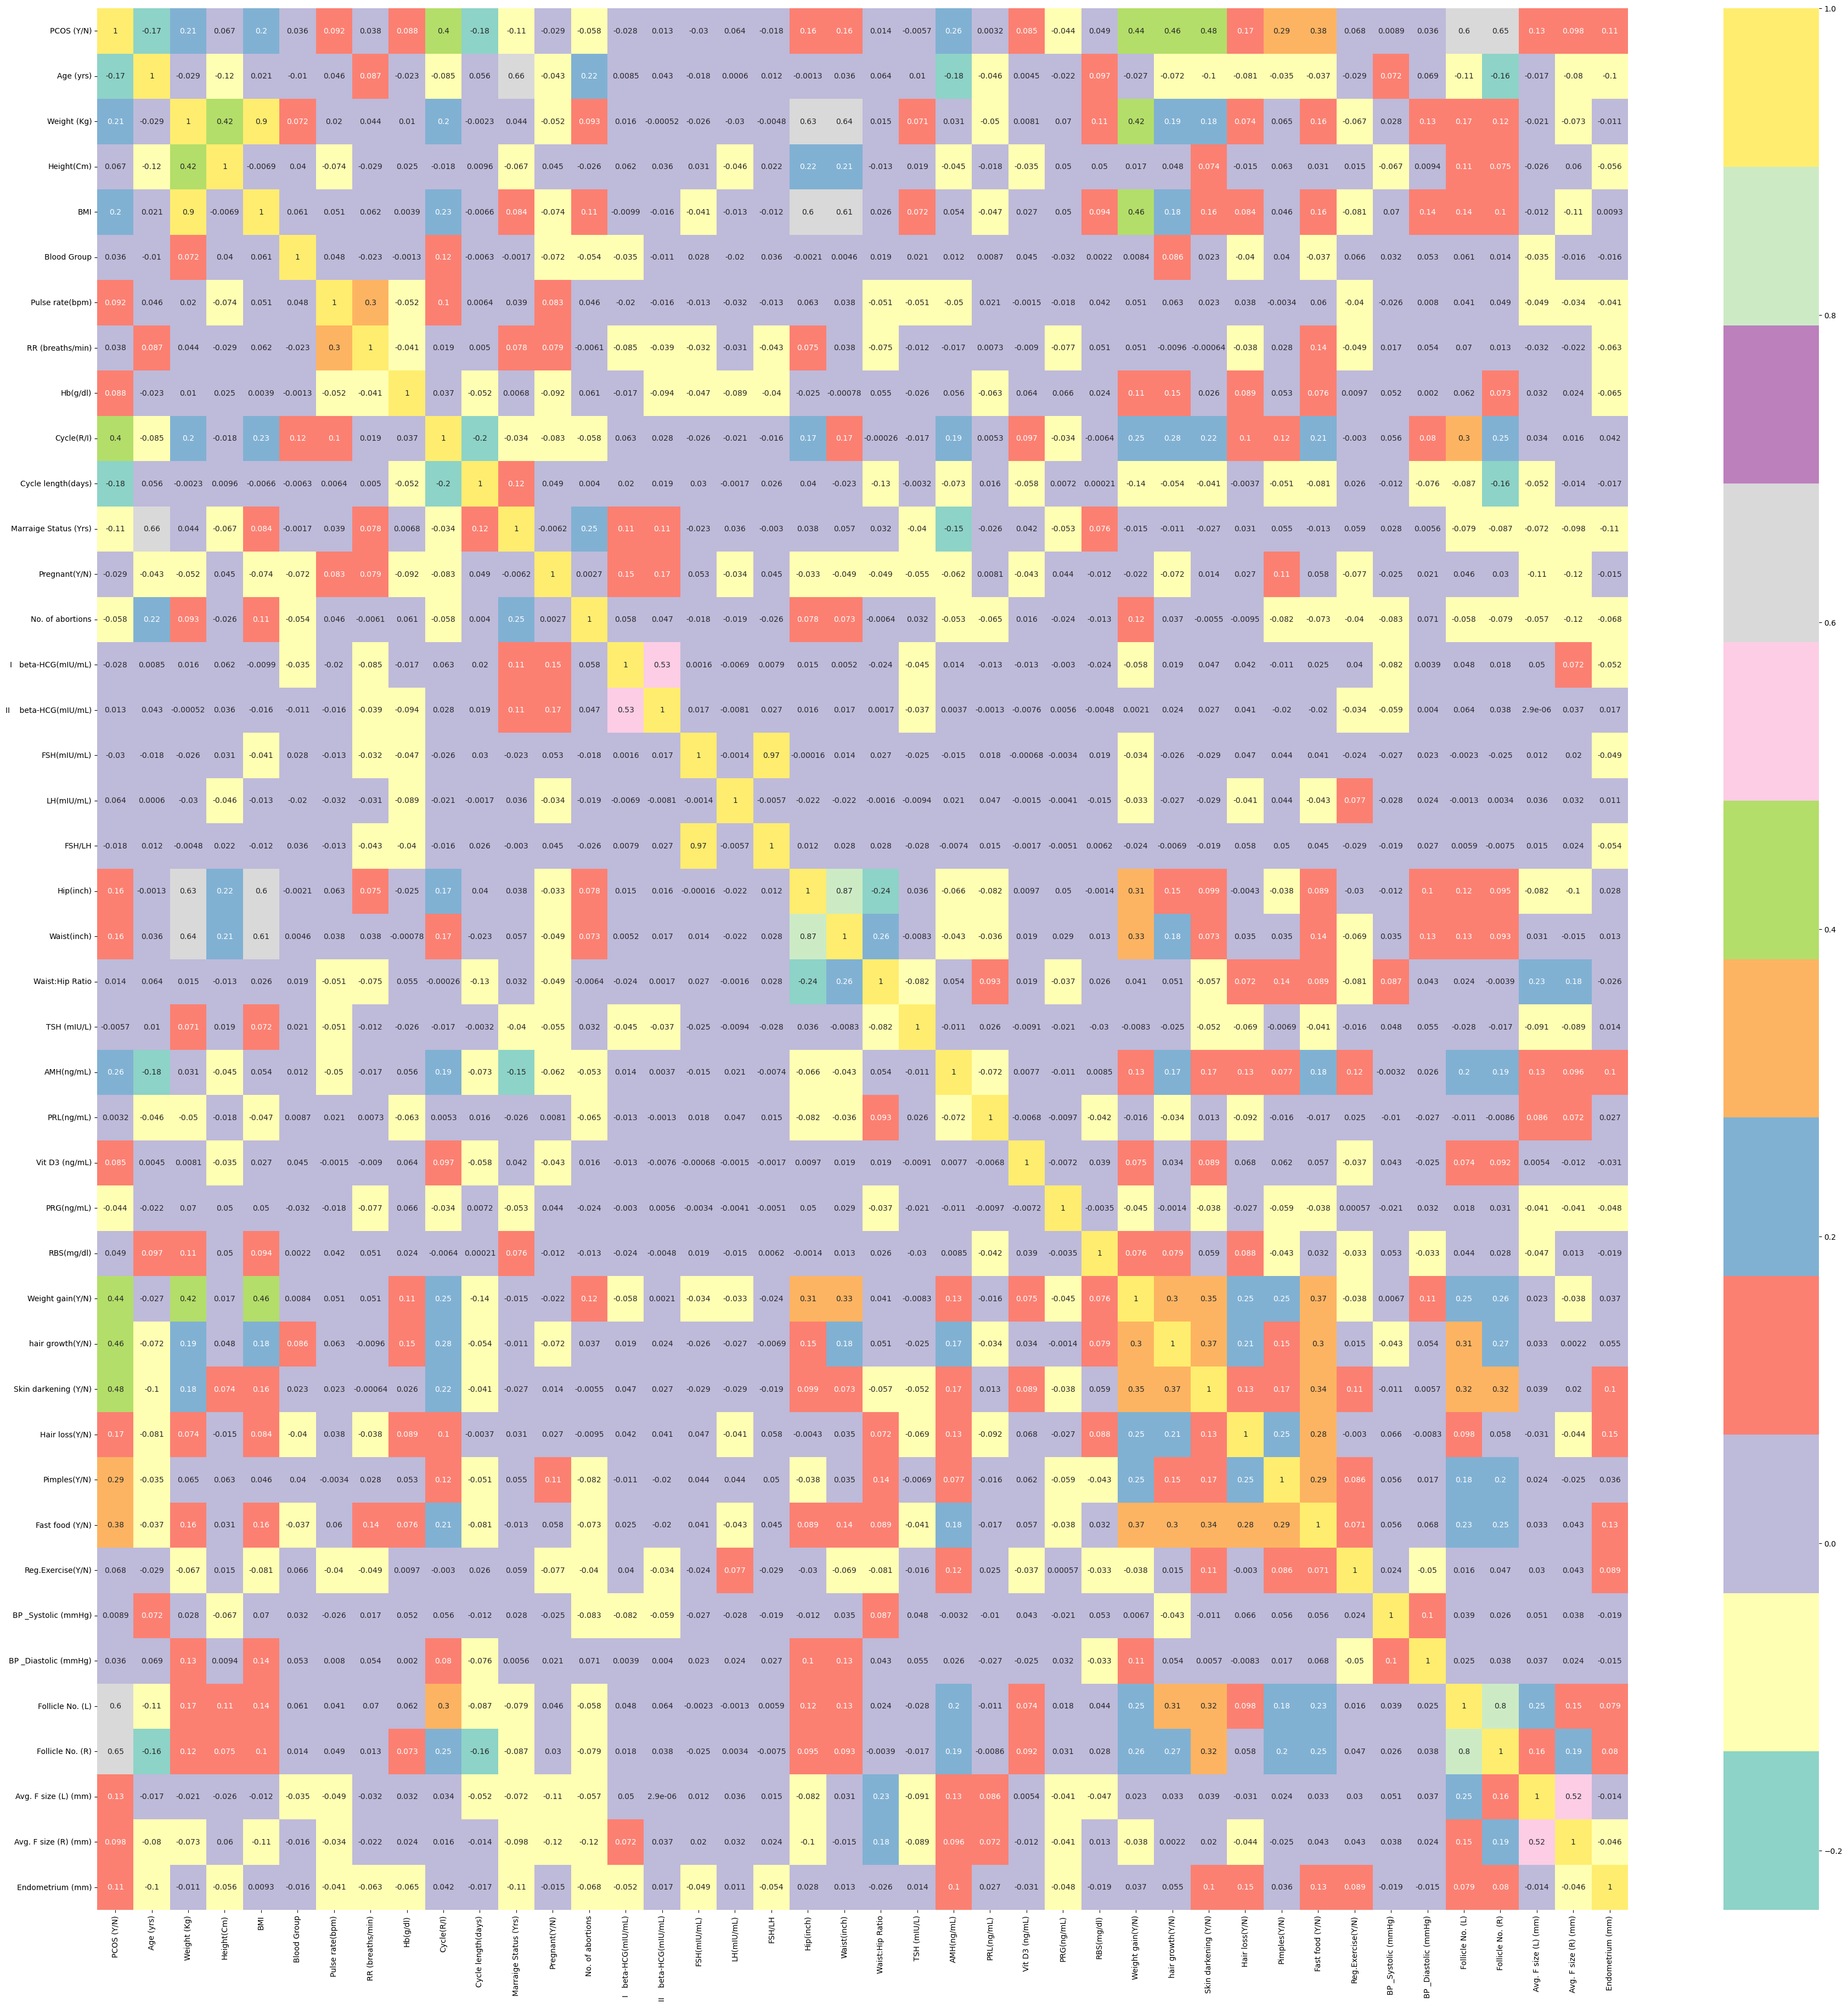

In [193]:
correlation_mat = pcos_normalized_dt.corr()

#get correlations of each features in dataset
feature_index = correlation_mat.index
plt.figure(figsize = (45,45))

#plot heat map
plot_heatmap = sns.heatmap(pcos_normalized_dt[feature_index].corr(),annot=True,cmap="Set3")


In [194]:
correlation_mat['PCOS (Y/N)'].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648223
Follicle No. (L)          0.603109
Skin darkening (Y/N)      0.475283
hair growth(Y/N)          0.464245
Weight gain(Y/N)          0.440488
Cycle(R/I)                0.401165
Fast food (Y/N)           0.375389
Pimples(Y/N)              0.287802
AMH(ng/mL)                0.263863
Weight (Kg)               0.211628
BMI                       0.199753
Hair loss(Y/N)            0.171913
Waist(inch)               0.164378
Hip(inch)                 0.161480
Avg. F size (L) (mm)      0.133808
Endometrium (mm)          0.105151
Avg. F size (R) (mm)      0.097950
Pulse rate(bpm)           0.092084
Hb(g/dl)                  0.088046
Vit D3 (ng/mL)            0.085491
Reg.Exercise(Y/N)         0.067809
Height(Cm)                0.067358
LH(mIU/mL)                0.063817
RBS(mg/dl)                0.048956
RR (breaths/min)          0.037530
BP _Diastolic (mmHg)      0.036494
Blood Group               0.035892
Waist:Hip Ratio     

Selecting the top 15 features with highest p-value

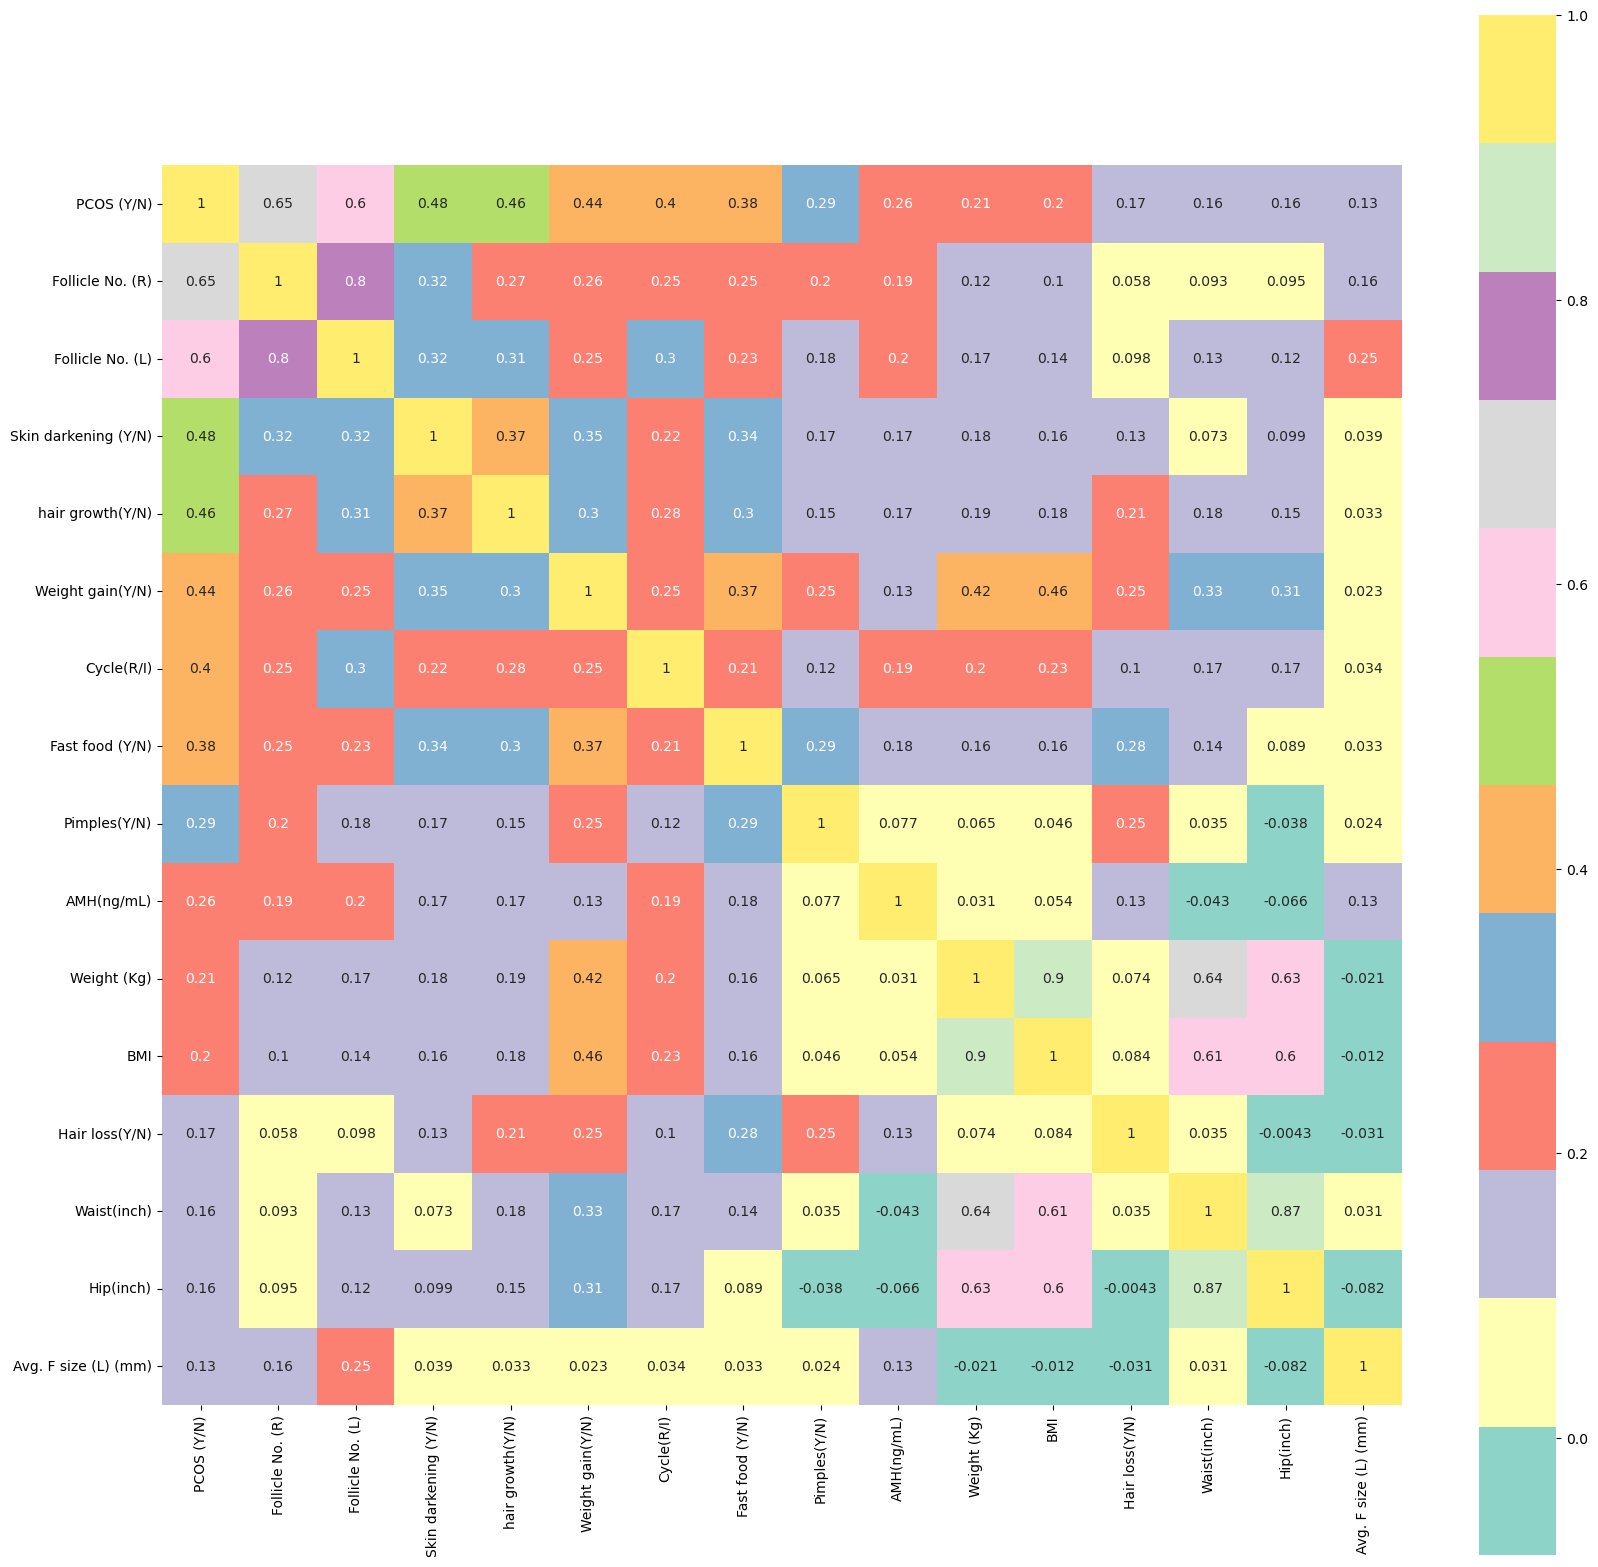

In [195]:
imp_features = correlation_mat.nlargest(16,'PCOS (Y/N)')['PCOS (Y/N)'].index 
plt.figure(figsize = (20,20))
plot_heat_map_after = sns.heatmap(pcos_normalized_dt[imp_features].corr(),annot=True,square=True,
                                  cmap="Set3",annot_kws={'size':10})


In [196]:
correlation_mat.nlargest(16,'PCOS (Y/N)')['PCOS (Y/N)']

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648223
Follicle No. (L)        0.603109
Skin darkening (Y/N)    0.475283
hair growth(Y/N)        0.464245
Weight gain(Y/N)        0.440488
Cycle(R/I)              0.401165
Fast food (Y/N)         0.375389
Pimples(Y/N)            0.287802
AMH(ng/mL)              0.263863
Weight (Kg)             0.211628
BMI                     0.199753
Hair loss(Y/N)          0.171913
Waist(inch)             0.164378
Hip(inch)               0.161480
Avg. F size (L) (mm)    0.133808
Name: PCOS (Y/N), dtype: float64

In [197]:
imp_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)',
       'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)',
       'Avg. F size (L) (mm)'],
      dtype='object')

In [198]:
pcos_df = pcos_normalized_dt[imp_features]

In [199]:
pcos_df.head()
# pcos_df.shape

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),BMI,Hair loss(Y/N),Waist(inch),Hip(inch),Avg. F size (L) (mm)
0,0.0,0.15,0.136364,0.0,0.0,0.0,0.0,1.0,0.0,0.029894,0.176623,0.260377,0.0,0.260870,0.454545,0.750000
1,0.0,0.25,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.021700,0.441558,0.471698,0.0,0.347826,0.545455,0.625000
2,1.0,0.75,0.590909,0.0,0.0,0.0,0.0,1.0,1.0,0.099090,0.490909,0.486792,1.0,0.521739,0.636364,0.750000
3,0.0,0.10,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.016995,0.441558,0.652830,0.0,0.521739,0.727273,0.625000
4,0.0,0.20,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.032777,0.272727,0.290566,1.0,0.260870,0.500000,0.666667


# Model

## Dataset splitting

Splitting dataset into training, validation, and test sets.

In [200]:
X = pcos_df.iloc[:,1:].values
y = pcos_df.iloc[:,0].values

In [201]:
print(X.shape)
print(y.shape)

(540, 15)
(540,)


In [202]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=189)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test,test_size=0.3,random_state=189)

## 1. Decision Tree

In [203]:
depths = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,200]
ac=[]

In [204]:
for i in depths:
  dtree_clf = tree.DecisionTreeClassifier(max_depth=i,min_samples_leaf=4)
  dtree_clf.fit(X_train,y_train)
  y_pred_dtree = dtree_clf.predict(X_val)
  ac.append(accuracy_score(y_val,y_pred_dtree)*100)

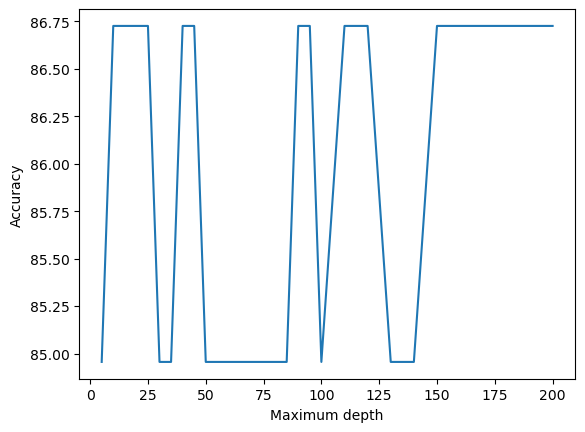

In [205]:
plt.plot(depths,ac,label='Test_accuracy')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

In [206]:
#Finding the depth for which Accuracy is maximum

max_acc = max(ac)  
max_dt = depths[ac.index(max_acc)]  
print(max_acc, max_dt)

86.72566371681415 10


In [207]:
#Using the depth which gave the maximum a15,ccuracy to train the model
dtree_clf = tree.DecisionTreeClassifier(max_depth=max_dt,min_samples_leaf=4)
dtree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4)

In [208]:
y_pred_dtree = dtree_clf.predict(X_val)

In [209]:
acc_dtree = accuracy_score(y_val,y_pred_dtree)
print(acc_dtree)

0.8495575221238938


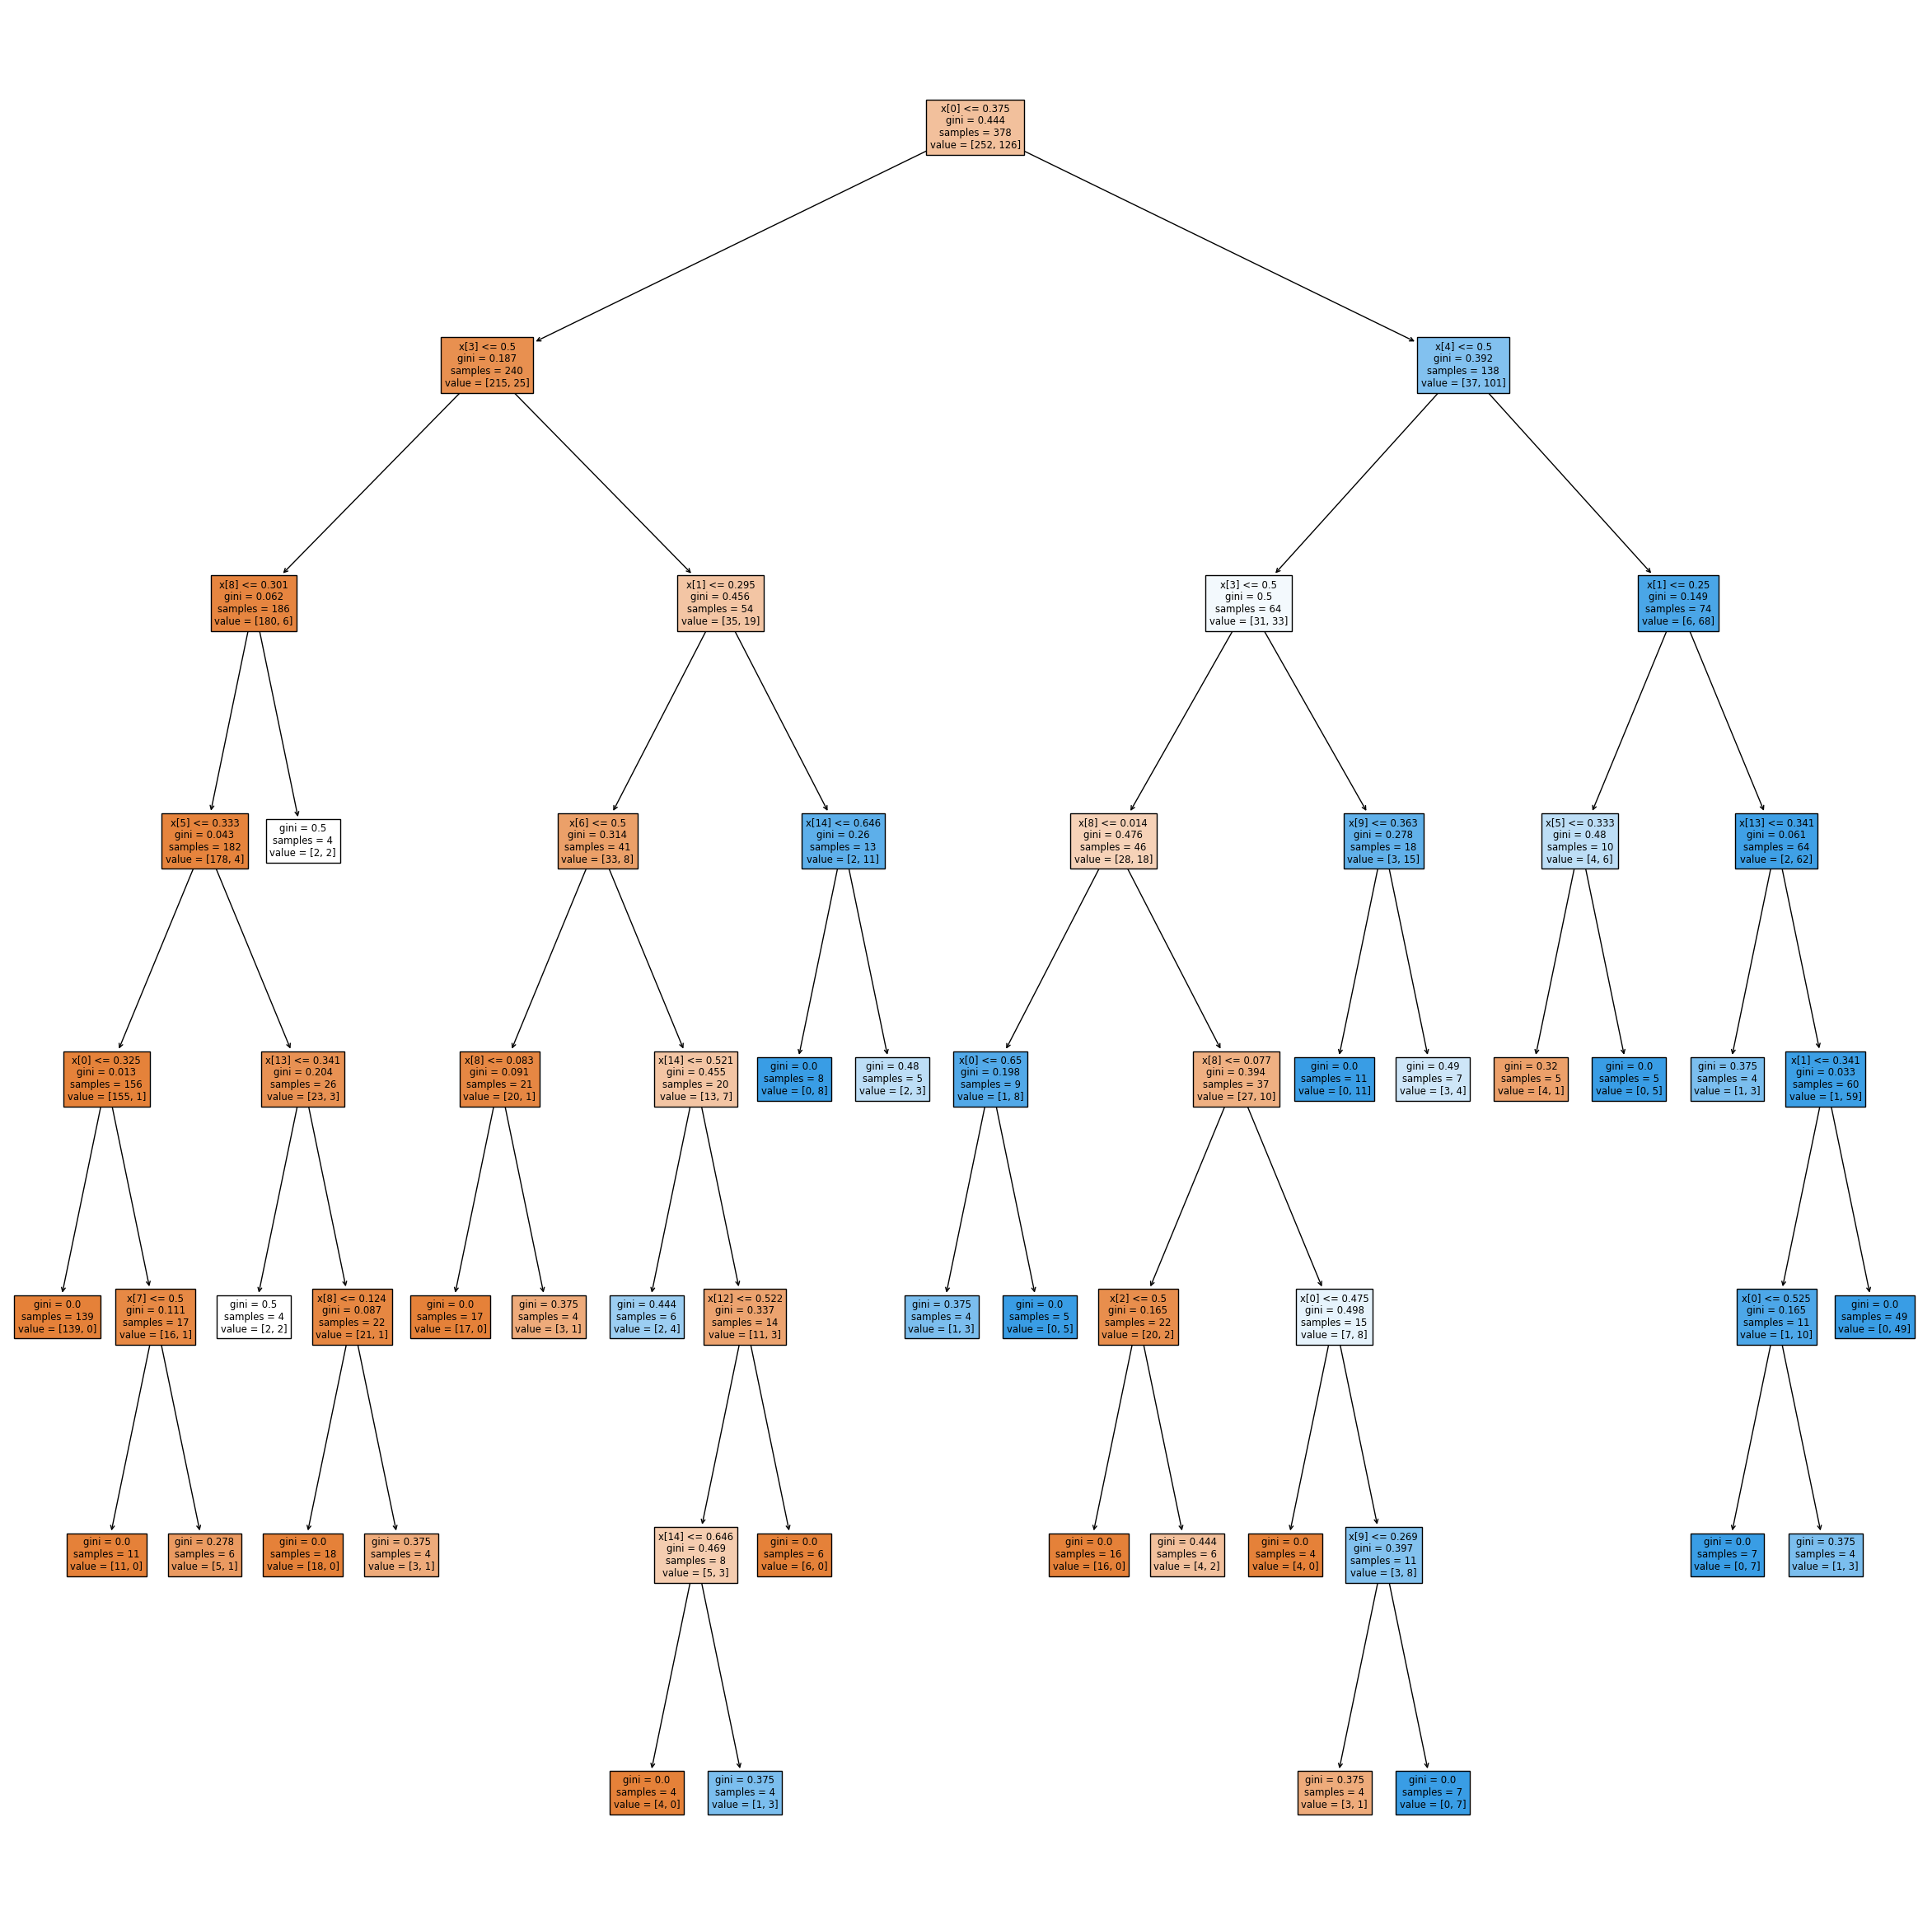

In [210]:
fig = plt.figure(figsize=(30,30))
dtree_plot = tree.plot_tree(dtree_clf,filled=True)

#### Analyzation of the model

In [211]:
print(metrics.classification_report(y_val, y_pred_dtree))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        75
         1.0       0.84      0.68      0.75        38

    accuracy                           0.85       113
   macro avg       0.85      0.81      0.82       113
weighted avg       0.85      0.85      0.85       113



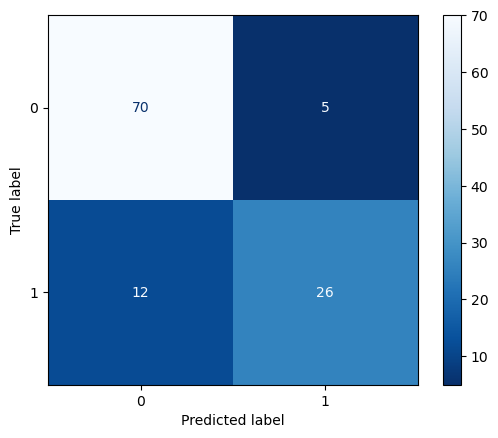

In [212]:
cm_dree = metrics.confusion_matrix(y_val, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_dree, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

In [213]:
from sklearn.metrics import roc_curve, auc
# Use the trained Decision Tree model (dtree_clf) and X_val for predictions
y_prob_dtree = dtree_clf.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_val, y_prob_dtree)

# Calculate Area Under the Curve (AUC)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

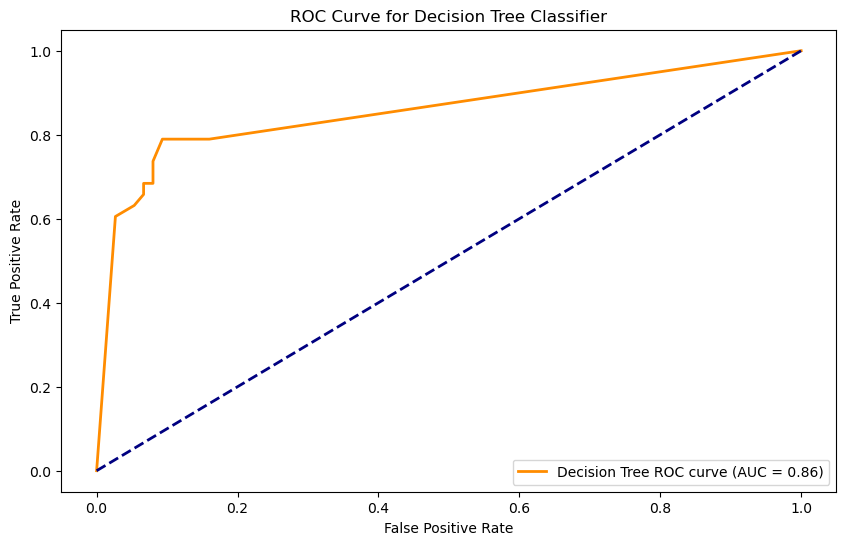

In [214]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dtree, tpr_dtree, color='darkorange', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

In [215]:
# Print the AUC value
print(f'AUC for Decision Tree: {roc_auc_dtree:.4f}')

AUC for Decision Tree: 0.8567


## 2.SVM

In [216]:
S = SVC(kernel = 'linear')
S.fit(X_train,y_train)

SVC(kernel='linear')

In [217]:
y_pred_svm = S.predict(X_val)

In [218]:
acc_svm = accuracy_score(y_val,y_pred_svm)
print(acc_svm)

0.9026548672566371


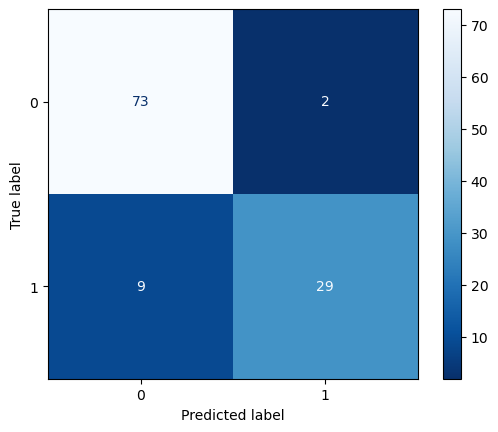

In [219]:
cm_svm = metrics.confusion_matrix(y_val, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

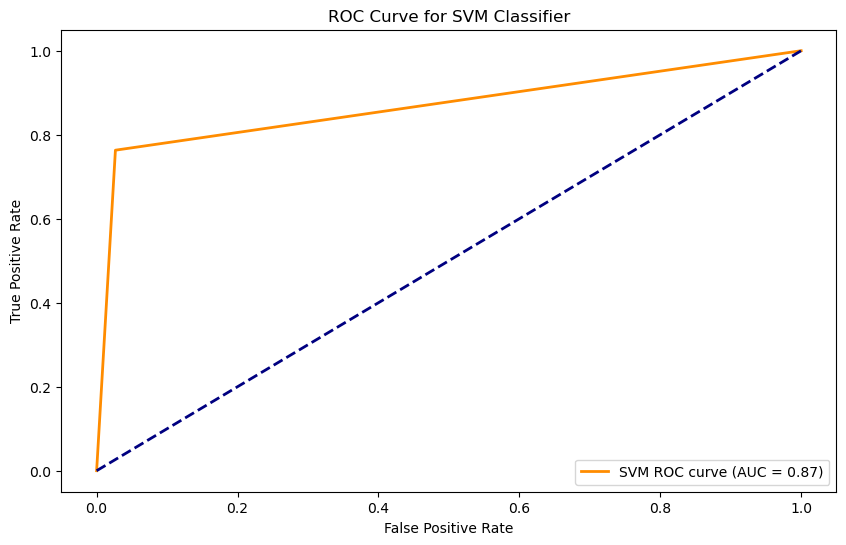

In [220]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

In [221]:
print(f'AUC for SVM: {roc_auc_svm:.4f}')

AUC for SVM: 0.8682


## 3.Naive Bayes classifier

In [222]:
import numpy as np 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [223]:
# K-fold cross validation
kf = KFold(n_splits=5, shuffle=True) 

accuracy_scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Gaussian Naive Bayes model
    gnb = GaussianNB()

    # Fit model with Laplace smoothing 
    gnb.fit(X_train, y_train, sample_weight=None) 

    # Make predictions
    y_pred = gnb.predict(X_test)
    
    # Evaluate cross-validation accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [224]:
# Print average accuracy   
print("Accuracy:", np.mean(accuracy_scores)*100,"%")

Accuracy: 87.77777777777779 %


In [225]:
# Evaluate the accuracy
acc_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_nb * 100, "%")

Accuracy: 87.96296296296296 %


In [226]:
# Evaluate overall performance
print("Overall Classification Report:")
print(classification_report(y_test, y_pred))

Overall Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90        68
         1.0       0.83      0.85      0.84        40

    accuracy                           0.88       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.88      0.88      0.88       108



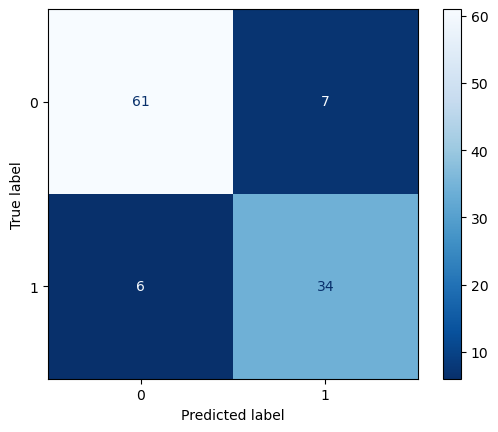

In [227]:
# Assuming y_true_all and y_pred_all are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap="Blues_r")
plt.show()


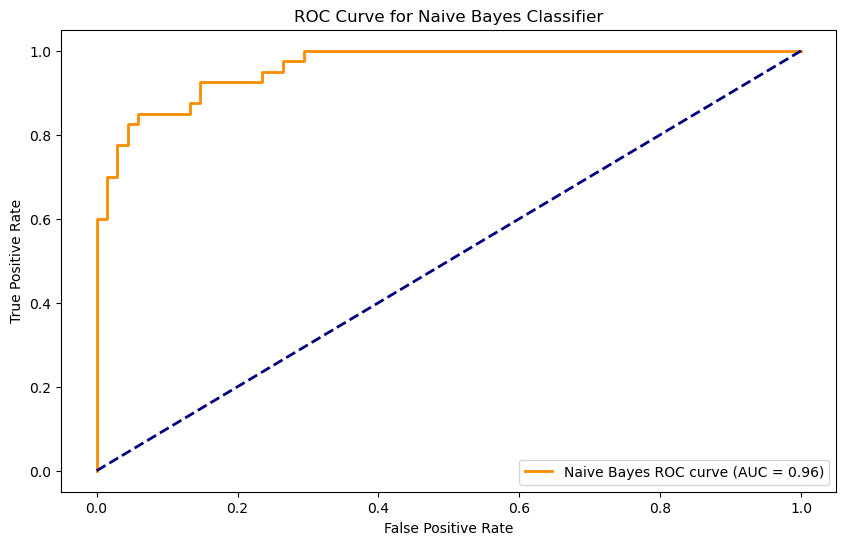

In [228]:
# ROC Curve and AUC for Naive Bayes
y_prob_nb = gnb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

In [229]:
print(f'AUC for Naive Bayes: {roc_auc_nb:.4f}')

AUC for Naive Bayes: 0.9621


## 4.XG Boost 

In [230]:
pip install xgboost

In [231]:
# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions 
y_pred = model.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.81%


In [232]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        68
         1.0       0.91      0.80      0.85        40

    accuracy                           0.90       108
   macro avg       0.90      0.88      0.89       108
weighted avg       0.90      0.90      0.90       108



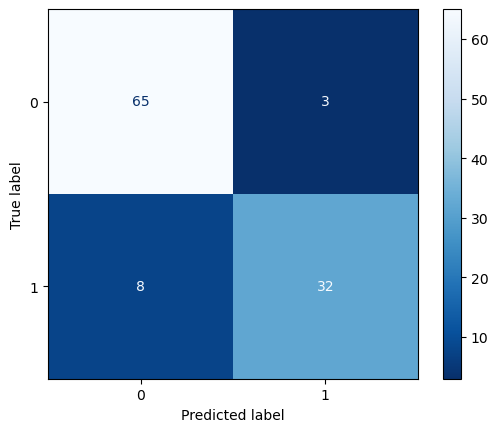

In [233]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['0', '1'])
disp_xgb.plot(cmap="Blues_r")
plt.show()

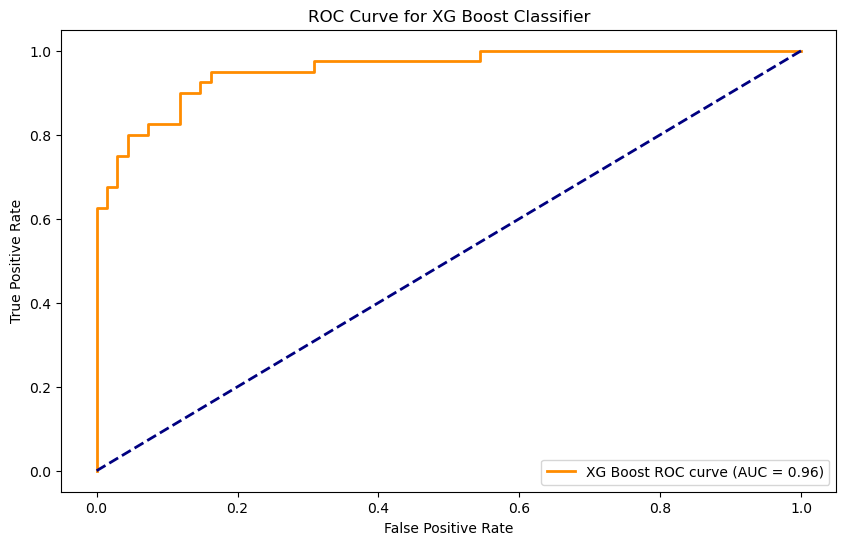

In [234]:
# ROC Curve and AUC for XG Boost
y_prob_xgb = model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XG Boost ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XG Boost Classifier')
plt.legend(loc='lower right')
plt.show()

In [235]:
print(f'AUC for XG Boost: {roc_auc_xgb:.4f}')

AUC for XG Boost: 0.9551


# Comparing Different Models

Using a box plot

In [236]:
# Comparing Different Models - Pie Chart

# Create a dictionary to store the accuracies of different models
model_accuracies = {
    'Decision Tree': acc_dtree,
    'SVM': acc_svm,
    'Naive Bayes': acc_nb,
    'XG Boost': accuracy_score(y_test, y_pred)
}


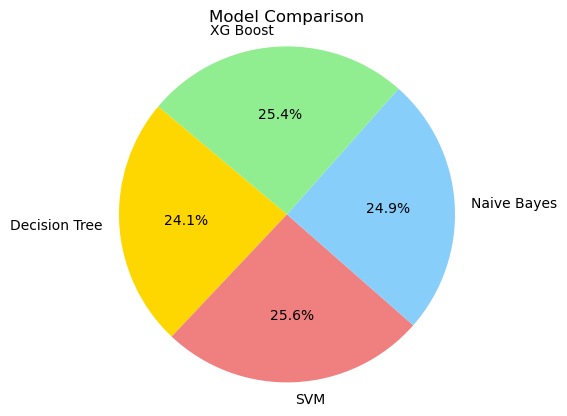

In [237]:
# Plotting the pie chart
labels = model_accuracies.keys()
sizes = model_accuracies.values()
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model Comparison')
plt.show()

plt.show()

In [238]:
# Comparing Different Models - Bar Graph

# Create a dictionary to store the accuracies of different models
model_accuracies = {
    'Decision Tree': acc_dtree,
    'SVM': acc_svm,
    'Naive Bayes': acc_nb,
    'XG Boost': accuracy_score(y_test, y_pred)
}


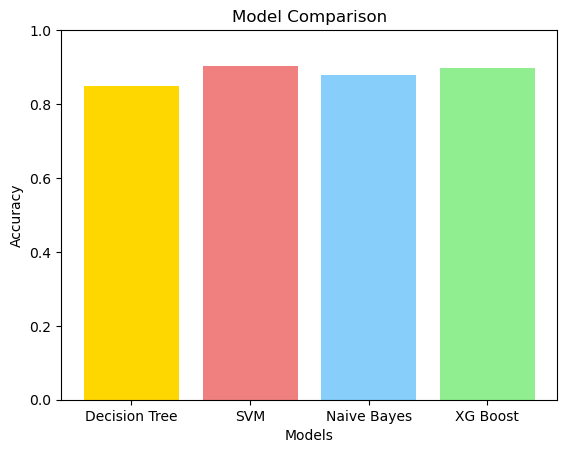

In [239]:
# Plotting the bar graph
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy percentage
plt.show()

In [240]:
# Printing the accuracy results of each algorithm
print("Decision Tree Accuracy:", acc_dtree*100)
print("SVM Accuracy:", acc_svm*100)
print("Naive Bayes Accuracy:", acc_nb*100)
print("XG Boost Accuracy:", accuracy_score(y_test, y_pred)*100)

Decision Tree Accuracy: 84.95575221238938
SVM Accuracy: 90.2654867256637
Naive Bayes Accuracy: 87.96296296296296
XG Boost Accuracy: 89.81481481481481
